In [1]:
import pandas as pd
import numpy as np
input_data = pd.read_csv("2023_smartFarm_AI_hackathon_dataset.csv")

In [13]:
# input_data["frmDist"].unique()

In [2]:
naval=input_data.sum()
# naval[naval==0]

In [3]:
input_data = input_data.drop(['daysuplyqy', 'lefstalklt', 'frtstSetCo', 'pllnLt', 'flanJnt', 'hvstJnt', 'flwrCo', 'frtstJnt'], axis=1)

In [16]:
# df_delna.columns

In [4]:
input_data.sort_values(by=["frmDist","date"],ascending=True,inplace=True)
jflist=input_data["frmDist"].unique()
fj_env=input_data.groupby("frmDist")
# print(jflist)
# len(jflist)

In [8]:
# df_delna.describe()

In [9]:
# df_delna.columns

### 환경

In [256]:
df=fj_env.get_group('DBSF6502')
df_env=df.reindex(columns=["date","inTp","outTp","inHd","inCo2","outWs","acSlrdQy","ec","ph","outtrn_cumsum","HeatingEnergyUsage_cumsum"])
df_env=df_env.set_index("date")
df_env.describe()

,inTp,outTp,inHd,inCo2,outWs,acSlrdQy,ec,ph,outtrn_cumsum,HeatingEnergyUsage_cumsum
count,371.000000,371.000000,371.000000,371.000000,371.0,371.000000,371.000000,371.000000,371.000000,371.0
mean,19.715266,10.979678,83.152695,424.913694,0.0,1357.641598,1.004762,2.236440,26493.489645,0.0
std,5.814949,10.831229,18.962215,115.645089,0.0,752.786577,1.296114,2.882558,33665.391462,0.0
min,0.000000,-15.355294,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,16.622718,1.301140,76.870447,369.927892,0.0,784.557403,0.000000,0.000000,0.000000,0.0
50%,19.221216,12.199421,84.687717,424.747711,0.0,1301.890830,0.000000,0.000000,5498.575269,0.0
75%,22.742126,20.852191,93.877911,483.943312,0.0,1880.992083,2.445912,5.456943,48223.353407,0.0
max,34.974815,34.601406,114.199988,1038.176430,0.0,3078.582567,4.187315,7.370619,110218.808068,0.0


### 생육

In [257]:
df.columns

Index(['frmDist', 'date', 'inTp', 'inHd', 'otmsuplyqy', 'acSlrdQy', 'cunt',
       'ph', 'outTp', 'outWs', 'inCo2', 'ec', 'frmYear', 'frmWeek',
       'frtstGrupp', 'flanGrupp', 'frtstCo', 'tcdmt', 'frmhsFclu', 'hvstGrupp',
       'grwtLt', 'fcluHg', 'lefLt', 'hvstCo', 'lefCunt', 'lefBt', 'stemThck',
       'frmAr', 'frmDov', 'outtrn_cumsum', 'WaterUsage', 'WaterCost',
       'FertilizerUsage', 'FertilizerCost', 'CO2Usage', 'CO2Cost',
       'MistUsageTime', 'Mist Cost', 'HeatingEnergyUsage_cumsum'],
      dtype='object')

In [258]:
# df=fj_env.get_group('DBSF8704')
df_grow=df.reindex(columns=["date","cunt","frtstGrupp","flanGrupp","frtstCo", 'tcdmt', 'frmhsFclu', 'hvstGrupp',
       'grwtLt', 'fcluHg', 'lefLt', 'hvstCo', 'lefCunt',
       'lefBt', 'stemThck', 'frmAr', 'frmDov', "outtrn_cumsum"])
df_grow=df_grow.set_index("date")
# df_grow.info()
df_grow

,cunt,frtstGrupp,flanGrupp,frtstCo,tcdmt,frmhsFclu,hvstGrupp,grwtLt,fcluHg,lefLt,hvstCo,lefCunt,lefBt,stemThck,frmAr,frmDov,outtrn_cumsum
date,,,,,,,,,,,,,,,,,
20170709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,0.0
20170710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,0.0
20170711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,0.0
20170712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,0.0
20170713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,0.0
20180711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,0.0
20180712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,0.0


# 전체 데이터 

In [5]:
df=fj_env.get_group('DBSF6502')
total_df=df.reindex(columns=["date","inTp","outTp","inHd","inCo2","outWs","acSlrdQy","ec","ph",
                    "frtstGrupp","flanGrupp","frtstCo", 'tcdmt', 'frmhsFclu', 'hvstGrupp',
                    'grwtLt', 'fcluHg', 'lefLt', 'hvstCo', 'lefCunt',
                    'lefBt', 'stemThck', 'frmAr', 'frmDov'
                    ,"outtrn_cumsum","HeatingEnergyUsage_cumsum"])

# na -> 앞방향 interpolate

In [6]:
total_df.loc[total_df["outtrn_cumsum"]==0,"outtrn_cumsum"]=None

In [7]:
total_df["outtrn_cumsum"]

55905   NaN
55906   NaN
55907   NaN
55908   NaN
55909   NaN
         ..
56271   NaN
56272   NaN
56273   NaN
56274   NaN
56275   NaN
Name: outtrn_cumsum, Length: 371, dtype: float64

In [8]:
total_df["outtrn_cumsum"]=total_df["outtrn_cumsum"].fillna(method='ffill' or 'pad')

/tmp/ipykernel_430/2916908876.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  total_df["outtrn_cumsum"]=total_df["outtrn_cumsum"].fillna(method='ffill' or 'pad')


In [9]:
total_df

,date,inTp,outTp,inHd,inCo2,outWs,acSlrdQy,ec,ph,frtstGrupp,...,fcluHg,lefLt,hvstCo,lefCunt,lefBt,stemThck,frmAr,frmDov,outtrn_cumsum,HeatingEnergyUsage_cumsum
55905,20170709,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,NaN,0.0
55906,20170710,26.671005,23.043428,85.617793,428.404650,0.0,464.801501,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,NaN,0.0
55907,20170711,28.320491,30.729993,78.448524,398.657465,0.0,2062.768079,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,NaN,0.0
55908,20170712,34.974815,25.696319,78.142971,421.213342,0.0,2758.561044,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,NaN,0.0
55909,20170713,27.398450,25.549837,80.634189,391.744376,0.0,1975.662141,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56271,20180710,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,108665.784452,0.0
56272,20180711,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,108665.784452,0.0
56273,20180712,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,108665.784452,0.0
56274,20180713,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,108665.784452,0.0


In [10]:
# total_df["outtrn_cumsum"]=total_df["outtrn_cumsum"].fillna(0)
total_df=total_df.dropna(subset=['outtrn_cumsum'])

In [11]:
total_df

,date,inTp,outTp,inHd,inCo2,outWs,acSlrdQy,ec,ph,frtstGrupp,...,fcluHg,lefLt,hvstCo,lefCunt,lefBt,stemThck,frmAr,frmDov,outtrn_cumsum,HeatingEnergyUsage_cumsum
55955,20170828,21.848074,22.469776,95.688315,317.929088,0.0,879.191082,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,136.803357,0.0
55956,20170829,20.742595,17.390254,85.752890,324.801424,0.0,2442.405211,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,280.257152,0.0
55957,20170830,17.472264,15.542267,97.808660,376.313560,0.0,542.806136,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,427.786336,0.0
55958,20170831,22.416162,21.666283,76.848384,349.953821,0.0,2304.139038,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,569.289029,0.0
55959,20170901,27.191351,20.948793,76.009258,361.396128,0.0,1691.198476,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,725.074140,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56271,20180710,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,108665.784452,0.0
56272,20180711,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,108665.784452,0.0
56273,20180712,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,108665.784452,0.0
56274,20180713,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1300,8.8,108665.784452,0.0


In [12]:
# dataset_train_actual -> copy본
dataset_train_actual = total_df.copy()
dataset_train_actual['date']= dataset_train_actual['date'].astype('str')
dataset_train_actual['date']=pd.to_datetime(dataset_train_actual['date'])


In [13]:
# dataset_train_timeindex 시간 index
dataset_train_timeindex = dataset_train_actual.set_index('date')

# dataset_train -> copy본
dataset_train = dataset_train_actual.copy()

In [14]:
list(dataset_train)[1:25]

['inTp',
 'outTp',
 'inHd',
 'inCo2',
 'outWs',
 'acSlrdQy',
 'ec',
 'ph',
 'frtstGrupp',
 'flanGrupp',
 'frtstCo',
 'tcdmt',
 'frmhsFclu',
 'hvstGrupp',
 'grwtLt',
 'fcluHg',
 'lefLt',
 'hvstCo',
 'lefCunt',
 'lefBt',
 'stemThck',
 'frmAr',
 'frmDov',
 'outtrn_cumsum']

In [15]:
# training and predictions 포함된 열 선택
cols = list(dataset_train)[1:24]

# datelist_train 그림그리기위한 시간 열
datelist_train = list(dataset_train['date'])
datelist_train = [date for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (321, 26)
All timestamps == 321
Featured selected: ['inTp', 'outTp', 'inHd', 'inCo2', 'outWs', 'acSlrdQy', 'ec', 'ph', 'frtstGrupp', 'flanGrupp', 'frtstCo', 'tcdmt', 'frmhsFclu', 'hvstGrupp', 'grwtLt', 'fcluHg', 'lefLt', 'hvstCo', 'lefCunt', 'lefBt', 'stemThck', 'frmAr', 'frmDov']


In [16]:
len(dataset_train.columns)

26

In [273]:
# datelist_train에서 ,있다면 없애주기
dataset_train = dataset_train[cols].astype(str)
# for i in cols:
#     for j in range(0, len(dataset_train)):
#         dataset_train[i][j] = dataset_train[i][j].replace(',', '')

# datelist_train float 타입으로 바꿔주기
dataset_train = dataset_train.astype(float)

# 여러 feature값 (predictors)
training_set = dataset_train.values

print('Shape of training set == {}.'.format(training_set.shape))

Shape of training set == (321, 23).


In [274]:
# Feature Scaling
# y값은 스케일링 안하고 x값만 스케일링
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
train_set_scale = sc.fit_transform(training_set[:,1:])

train_set_scale=np.append(training_set[:, 0:1],train_set_scale,axis=1)
train_set_scale

array([[21.84807365,  0.87192962,  0.83790127, ...,  0.        ,
         0.        ,  0.        ],
       [20.74259469,  0.75483834,  0.75090104, ...,  0.        ,
         0.        ,  0.        ],
       [17.47226411,  0.71223924,  0.85646822, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.3539646 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.3539646 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.3539646 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping

from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

import numpy.random as nr
import scipy.stats as ss
import math

import time

%matplotlib inline

2023-09-16 08:11:59.457958: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-16 08:11:59.460212: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 08:11:59.500209: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 08:11:59.501264: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 08:12:00.144001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [20]:
train_set_scale[-1],train_set_scale.shape

NameError: name 'train_set_scale' is not defined

In [18]:
x_train

NameError: name 'x_train' is not defined

In [277]:
# Creating a data structure with 30 timestamps and 1 output
x_train = []
y_train = []
x_test = []
y_test = []

n_future = 1  # Number of days we want top predict into the future
n_past = 7 # Number of past days we want to use to predict the future

labels = np.array([row[-1] for row in train_set_scale])
indx = range(train_set_scale.shape[0])
indx = ms.train_test_split(indx, test_size = 0.07, shuffle=False)

Features_scaled_train = train_set_scale[indx[0],:]
Features_scaled_test = train_set_scale[indx[1],:]

for i in range(n_past, len(Features_scaled_train) - n_future +1):
    x_train.append(Features_scaled_train[i - n_past:i, 0:Features_scaled_train.shape[1]])
    y_train.append(Features_scaled_train[i + n_future -1:i + n_future, 0])

for i in range(n_past, len(Features_scaled_test) - n_future +1):
    x_test.append(Features_scaled_test[i - n_past:i, 0:Features_scaled_test.shape[1]])
    y_test.append(Features_scaled_test[i + n_future -1:i + n_future, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
from tensorflow.keras.models import load_model
from sklearn import linear_model

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)


    ## Print the usual metrics and the R^2 values
    # print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    # print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    # print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2*100))
    # print('Adjusted R^2           = ' + str(r2_adj))

    return sklm.mean_squared_error(y_true, y_predicted), r2

In [279]:
model_results = []

In [280]:
new_res_df = pd.DataFrame(model_results)

In [281]:
# Save all the results

model_results_dict = {}

model_results_dict['Algo'] = 'Linear Regression'
model_results_dict['lag'] = 'NA'
model_results_dict['dropout'] = 'NA'
model_results_dict['epochs'] = 'NA'
model_results_dict['batch_size'] = 'NA'
model_results_dict['loss'] = 'NA'
model_results_dict['rmse'] = 'NA'
model_results_dict['r2'] = 'NA'
model_results_dict['time_ran'] = int(time.time())
model_results.append(model_results_dict)

In [282]:
def plot_res(y_test, y_score, label_test, label_score, dpi=100):
    plt.figure(figsize=(10,7), dpi=dpi)
    plt.plot(y_test, label=label_test)
    plt.plot(y_score, label=label_score)
    plt.legend(loc=1)
    plt.title('Y test vs. y_predict, lag ' )
    plt.show()


In [283]:
import matplotlib.pyplot as plt

Epoch 1/300
10/10 [==============================] - 2s 54ms/step - loss: 350.1764 - val_loss: 199.7843
Epoch 2/300
10/10 [==============================] - 0s 16ms/step - loss: 333.3385 - val_loss: 194.7637
Epoch 3/300
10/10 [==============================] - 0s 17ms/step - loss: 316.4865 - val_loss: 189.2737
Epoch 4/300
10/10 [==============================] - 0s 16ms/step - loss: 295.0014 - val_loss: 182.4217
Epoch 5/300
10/10 [==============================] - 0s 16ms/step - loss: 272.7084 - val_loss: 174.8030
Epoch 6/300
10/10 [==============================] - 0s 16ms/step - loss: 250.1629 - val_loss: 166.7568
Epoch 7/300
10/10 [==============================] - 0s 16ms/step - loss: 225.5090 - val_loss: 158.9234
Epoch 8/300
10/10 [==============================] - 0s 16ms/step - loss: 205.2278 - val_loss: 151.5953
Epoch 9/300
10/10 [==============================] - 0s 16ms/step - loss: 183.4361 - val_loss: 144.8367
Epoch 10/300
10/10 [==============================] - 0s 16ms/st

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



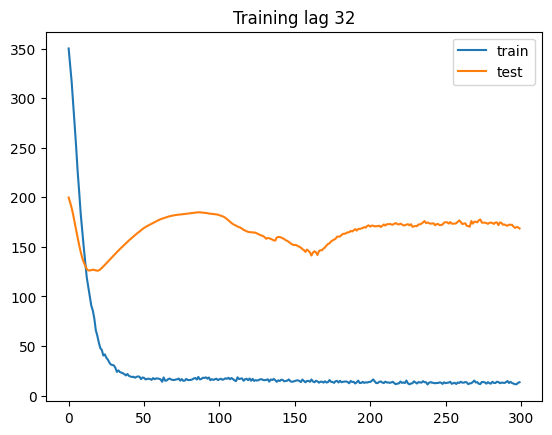

1/1 [==============================] - 0s 316ms/step
Mean Square Error      = 168.5958562030348
Root Mean Square Error = 12.98444670376966
Mean Absolute Error    = 11.263503509268537
Median Absolute Error  = 10.935614585876465
R^2                    = -0.15110291051932823
Adjusted R^2           = -0.918504850865547


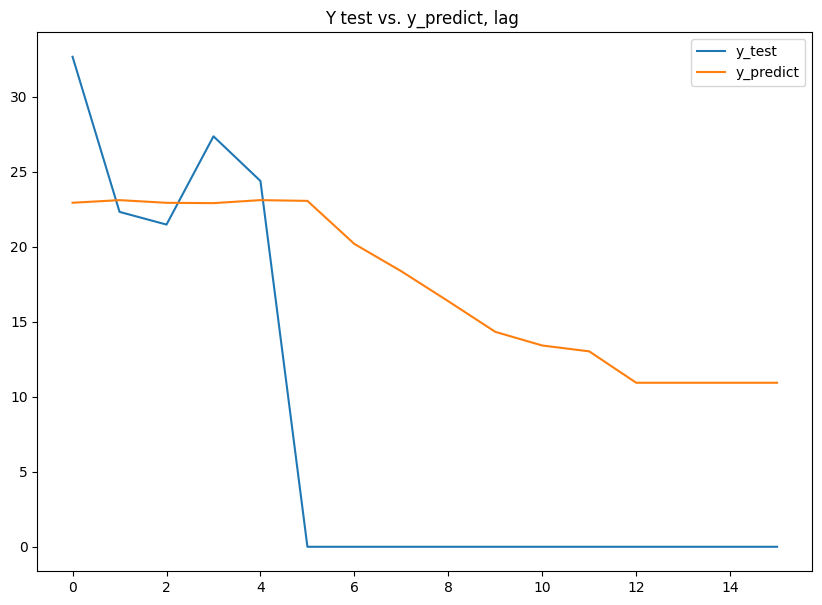

In [284]:
def LSTM_model(x_train, y_train, x_test, y_test,batch_size_= 32, dropout_=.3,epochs_=500, samples=32):


    # comment out this box and uncomment load_model to load saved model
    ###################################################################################

    # design network
    model = Sequential()
    model.add(LSTM(int(samples), input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dropout(dropout_))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit network
    history = model.fit(x_train,
                        y_train,
                        epochs=300,
                        batch_size=batch_size_,
                        validation_data=(x_test, y_test),
                        verbose=1,
                        shuffle=False)

    # Save model for later
    filename = str(int(time.time())) + '_model_' + str(samples) + '_lag.h5'
    model.save('model/' + filename)

    #################################################################################

    # uncomment to load
    #model = load_model('./models/1539911055_model_672_lag.h5')


    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.title('Training lag ' + str(samples))
    plt.show()

    n_parameters=x_train.shape[1]
    y_score = model.predict(x_test)
    (rmse, r2) = print_metrics(y_test, y_score, n_parameters)
    plot_res(y_test, y_score, label_test = 'y_test', label_score='y_predict')

    # Save all the results

    model_results_dict = {}

    model_results_dict['Algo'] = 'LSTM'
    model_results_dict['lag'] = samples
    model_results_dict['dropout'] = dropout_
    model_results_dict['epochs'] = epochs_
    model_results_dict['batch_size'] = batch_size_
    model_results_dict['loss'] = history.history
    model_results_dict['rmse'] = rmse
    model_results_dict['power_gen_rmse'] = math.sqrt(rmse)
    model_results_dict['r2'] = r2
    model_results_dict['model_filename'] = filename
    model_results_dict['time_ran'] = int(time.time())
    model_results.append(model_results_dict)

LSTM_model(x_train,y_train,x_test,y_test)



### 전체농가 순환 학습

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping

from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

import numpy.random as nr
import scipy.stats as ss
import math

import time

In [287]:
import keras
from keras import backend as K
from keras.optimizers import *
from keras.models import Sequential, Model
from keras.layers import LSTM, Activation, Dense, Dropout, Flatten, UpSampling3D, Input, ZeroPadding3D, Lambda, Reshape, RepeatVector
from keras.losses import mse, binary_crossentropy,mean_absolute_error, mean_squared_error

from tensorflow.keras.utils import plot_model

from keras.constraints import unit_norm, max_norm
from keras import regularizers
from keras import backend as K

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


from sklearn.model_selection import StratifiedKFold

import nibabel as nib
import scipy as sp
import scipy.ndimage
from sklearn.metrics import mean_squared_error, r2_score
binary_image = False

import sys
import argparse
import os
import glob
from tqdm import tqdm
import plotly.express as px
import cufflinks as cf
import seaborn as sns
cf.go_offline(connected=True)

In [288]:
def totalplot_res(y_test, vae_lstm,vae_1dcnn,y_score_lstm, label_test, dpi=100):
    plt.figure(figsize=(30,20), dpi=dpi)
    plt.plot(y_test,label=label_test)
    # plt.plot(y_score_cnnlstm,label="cnnlstm")
    plt.plot(y_score_lstm,label="lstm")
    plt.plot(vae_lstm,label="vae_lstm")
    plt.plot(vae_1dcnn,label="vae_1dcnn")
    plt.legend(loc=1)
    plt.title('Y test vs. y_predict, lag ' )
    plt.show()


In [289]:
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, GlobalMaxPool1D,TimeDistributed, GlobalMaxPooling1D,UpSampling1D

def total_model(df,batch_size_,dropout_,epochs_, samples, n_past_, L2_reg_):
    Features=df

    x_train = []
    y_train = []
    x_test = []
    y_test = []

    n_future = 1  # Number of days we want top predict into the future
    n_past = n_past_ # Number of past days we want to use to predict the future

    labels = np.array([row[0] for row in Features])
    indx = range(Features.shape[0])
    indx = ms.train_test_split(indx, test_size = 0.03, shuffle=False)

    #Features_train = sc.fit_transform(Features[0:len(indx[0])+1,:])
    #Features_test = sc.fit_transform(Features[len(indx[0])-n_past:len(Features),:])
    Features_train_x = sc.fit_transform(Features[0:len(indx[0])+1,1:7])
    Features_train_y = sc.fit_transform(Features[0:len(indx[0])+1,0:1])

    Features_train = np.hstack([Features_train_y,Features_train_x])

    Features_test_x = sc.fit_transform(Features[len(indx[0])-n_past:len(Features),1:7])
    Features_test_y = sc.fit_transform(Features[len(indx[0])-n_past:len(Features),0:1])

    Features_test = np.hstack([Features_test_y,Features_test_x])

    for i in range(n_past, len(indx[0]) - n_future +1):
        x_train.append(Features_train[i - n_past:i, 0:Features.shape[1]])
        y_train.append(Features_train[i:i + n_future ,0])

    for i in range(n_past, n_past+len(indx[1])):
        x_test.append(Features_test[i - n_past :i, 0:Features.shape[1]])
        y_test.append(Features_test[i:i + n_future,0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_test, y_test = np.array(x_test), np.array(y_test)
    x = x_train
    input_dim = x.shape[-1] # 7
    timesteps = x.shape[1] # 168
    batch_size = 64
    ## CNN Parameters
    #dropout_alpha = 0.5
    ft_bank_baseline = 16
    latent_dim = 7
    augment_size = 1000
    #L2_reg= 0.00
    binary_image = False
    input_r = Input(shape=(1, ), name='ground_truth')
    input_count = Input(shape=(x_train.shape[1],x_train.shape[2]), name='input_count')

    feature = LSTM(int(samples), input_shape=(x_train.shape[1], x_train.shape[2]))(input_count)
    feature = Dropout(dropout_)(feature)

    feature_dense = Dense(x_train.shape[2]*4, activation='tanh',kernel_regularizer=regularizers.l2(L2_reg_))(feature)

    feature_z_mean = Dense(x_train.shape[2]*2, activation='tanh')(feature_dense)
    z_mean = Dense(x_train.shape[2], name='z_mean')(feature_z_mean)
    feature_z_log_var = Dense(x_train.shape[2]*2, activation='tanh')(feature_dense)
    z_log_var = Dense(x_train.shape[2], name='z_log_var')(feature_z_log_var)

    feature_r_mean = Dense(x_train.shape[2]*2, activation='tanh')(feature_dense)
    r_mean = Dense(1, name='r_mean')(feature_r_mean)
    feature_r_log_var = Dense(x_train.shape[2]*2, activation='tanh')(feature_dense)
    r_log_var = Dense(1, name='r_log_var')(feature_r_log_var)

    # use reparameterization trick to push the sampling out as input
    z = Lambda(sampling, output_shape=(x_train.shape[2],), name='z')([z_mean, z_log_var])
    r = Lambda(sampling, output_shape=(1,), name='r')([r_mean, r_log_var])

    # instantiate encoder_lv model
    encoder_lv = Model([input_count,input_r], [z_mean, z_log_var, z, r_mean, r_log_var, r], name='encoder_lv')

    # build generator model
    generator_input = Input(shape=(1,), name='genrator_input')

    pz_mean = Dense(x_train.shape[2], name='pz_mean', kernel_constraint=unit_norm())(generator_input)
    pz_log_var = Dense(1, name='pz_log_var',kernel_constraint=max_norm(0))(generator_input)

    # instantiate generator model
    generator = Model(generator_input, [pz_mean,pz_log_var], name='generator')

    # build decoder model
    latent_input = Input(shape=(x_train.shape[2],), name='z_sampling')
    #decoded = RepeatVector(int(samples_))(latent_input)
    #decoded = LSTM(int(samples_), input_shape=(x_train.shape[1], x_train.shape[2]), activation='relu', return_sequences=True)(decoded)
    #outputs = TimeDistributed(Dense(5),input_shape=(x_train.shape[1], x_train.shape[2]))(decoded)

    decoded = Dense(x_train.shape[2]*2, activation='tanh',kernel_regularizer=regularizers.l2(L2_reg_))(latent_input)
    decoded = Dense(x_train.shape[2]*4, activation='tanh',kernel_regularizer=regularizers.l2(L2_reg_))(decoded)
    decoded = Dense(x_train.shape[2], activation='relu',kernel_regularizer=regularizers.l2(L2_reg_))(decoded)

    decoded = RepeatVector(x_train.shape[1])(decoded)
    h_decoded = LSTM(int(samples), return_sequences=True)(decoded)
    h_decoded = TimeDistributed(Dense(1))(h_decoded)
    outputs = Activation('relu')(h_decoded)

    # instantiate decoder model
    decoder = Model(latent_input, outputs, name='decoder')

    # instantiate VAE model
    pz_mean,pz_log_var = generator(encoder_lv([input_count,input_r])[5])
    outputs = decoder(encoder_lv([input_count,input_r])[2])
    vae_lstm = Model([input_count,input_r], [outputs, pz_mean,pz_log_var], name='vae_mlp')

    reconstruction_loss = K.mean(mean_absolute_error(input_count,outputs))
    kl_loss = 1 + z_log_var - pz_log_var - K.tf.divide(K.square(z_mean-pz_mean),K.exp(pz_log_var)) - K.tf.divide(K.exp(z_log_var),K.exp(pz_log_var))
    kl_loss = -0.5*K.sum(kl_loss, axis=-1)
    label_loss = K.tf.divide(0.5*K.square(r_mean - input_r), K.exp(r_log_var)) +  0.5 * r_log_var

    vae_loss = K.mean(reconstruction_loss+kl_loss+label_loss)

    vae_lstm.add_loss(vae_loss)
    vae_lstm.compile(optimizer='adam')

    # training
    callbacks = [EarlyStopping(monitor='val_loss', patience=20)]

    history_vae_lstm =  vae_lstm.fit([x_train,y_train],
                        verbose=2,
                        batch_size=batch_size_,
                        validation_data=[[x_test, y_test]],
                        epochs = epochs_,
                        callbacks=callbacks)

    # build encoder model
    input_r = Input(shape=(1, ), name='ground_truth')
    input_x = Input(shape=(None,7), name='input_x')
    feature = Conv1D(filters=72, kernel_size=4,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None,7])(input_x)
    feature = MaxPooling1D(pool_size=2, strides=1, padding='valid')(feature)

    feature = GlobalMaxPooling1D()(feature)
    # feature = LSTM(72, activation="tanh",return_sequences=True)(feature)
    # feature = LSTM(72, activation="tanh",return_sequences=False)(feature)
    feature = Dropout(0.1)(feature)
    feature_dense = Dense(latent_dim*4, activation='relu',kernel_regularizer=regularizers.l2(0.00))(feature)
    feature_z_mean = Dense(latent_dim*2, activation='relu')(feature_dense)
    z_mean = Dense(latent_dim, name='z_mean')(feature_z_mean)
    feature_z_log_var = Dense(latent_dim*2, activation='relu')(feature_dense)
    z_log_var = Dense(latent_dim, name='z_log_var')(feature_z_log_var)

    feature_r_mean = Dense(latent_dim*2, activation='relu')(feature_dense)
    r_mean = Dense(1, name='r_mean')(feature_r_mean)
    feature_r_log_var = Dense(latent_dim*2, activation='relu')(feature_dense)
    r_log_var = Dense(1, name='r_log_var')(feature_r_log_var)

    # use reparameterization trick to push the sampling out as input
    z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
    r = Lambda(sampling, output_shape=(1,), name='r')([r_mean, r_log_var])

    # instantiate encoder model
    encoder_cv = Model([input_x,input_r], [z_mean, z_log_var, z, r_mean, r_log_var, r], name='encoder_cv')
    # encoder_cv.summary()

    # build generator model
    generator_input = Input(shape=(1,), name='genrator_input')
    #inter_z_1 = Dense(int(latent_dim/4), activation='tanh', kernel_constraint=unit_norm(), name='inter_z_1')(generator_input)
    #inter_z_2 = Dense(int(latent_dim/2), activation='tanh', kernel_constraint=unit_norm(), name='inter_z_2')(inter_z_1)
    #pz_mean = Dense(latent_dim, name='pz_mean')(inter_z_2)
    pz_mean = Dense(latent_dim, name='pz_mean', kernel_constraint=unit_norm())(generator_input)
    pz_log_var = Dense(1, name='pz_log_var',kernel_constraint=max_norm(0))(generator_input)

    # instantiate generator model
    generator = Model(generator_input, [pz_mean,pz_log_var], name='generator')
    # generator.summary()

    # build decoder model
    latent_input = Input(shape=(latent_dim,), name='z_sampling')
    decoded = Dense(latent_dim*2, activation='tanh',kernel_regularizer=regularizers.l2(0.00))(latent_input)
    decoded = Dense(latent_dim*4, activation='tanh',kernel_regularizer=regularizers.l2(0.00))(decoded)
    decoded = Dense(7, activation='relu',kernel_regularizer=regularizers.l2(0.00))(decoded)
    # decoded = Reshape((int(patch_x/8),int(patch_y/8),int(patch_z/8),ft_bank_baseline*4))(decoded)
    decoded = Reshape([-1,7])(decoded)
    decoded = Conv1D(filters=7, kernel_size=4,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None,7])(decoded)
    decoded = Activation('relu')(decoded)
    decoded = UpSampling1D(size=7)(decoded)


    if binary_image:
    	outputs = Activation('sigmoid')(decoded)
    else:
        outputs = decoded

    # instantiate decoder model
    decoder = Model(latent_input, outputs, name='decoder')
    # decoder.summary()

    # instantiate VAE model
    pz_mean,pz_log_var = generator(encoder_cv([input_x,input_r])[5])
    outputs = decoder(encoder_cv([input_x,input_r])[2])
    vae_1dcnn = Model([input_x,input_r], [outputs, pz_mean,pz_log_var], name='vae_mlp')


    if binary_image:
        reconstruction_loss = K.mean(binary_crossentropy(input_x,outputs), axis=[1,2,3])
    else:
        reconstruction_loss = K.mean(mean_absolute_error(input_x,outputs))
        # reconstruction_loss = K.mean(mean_squared_error(input_x,outputs))


    kl_loss = 1 + z_log_var - pz_log_var - K.tf.divide(K.square(z_mean-pz_mean),K.exp(pz_log_var)) - K.tf.divide(K.exp(z_log_var),K.exp(pz_log_var))
    kl_loss = -0.5*K.sum(kl_loss, axis=-1)
    label_loss = K.tf.divide(0.5*K.square(r_mean - input_r), K.exp(r_log_var)) +  0.5 * r_log_var

    vae_loss = K.mean(reconstruction_loss+kl_loss+label_loss)

    vae_1dcnn.add_loss(vae_loss)
    vae_1dcnn.compile(optimizer='adam')

    # training
    callbacks = [EarlyStopping(monitor='val_loss', patience=20)]

    history_vae_1dcnn =  vae_1dcnn.fit([x_train,y_train],
                        verbose=2,
                        batch_size=batch_size_,
                        validation_data=[[x_test, y_test]],
                        epochs = epochs_,
                        callbacks=callbacks)

    #lstm
    model = Sequential()
    model.add(LSTM(int(samples), input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dropout(dropout_))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit network
    history_lstm = model.fit(x_train,
                        y_train,
                        epochs=epochs_,
                        batch_size=batch_size_,
                        validation_data=(x_test, y_test),
                        verbose=1,
                        shuffle=False,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

    # model_CL = tf.keras.models.Sequential([
    # tf.keras.layers.Conv1D(filters=24*7, kernel_size=4,
    #                     strides=1, padding="causal",
    #                     activation="relu",
    #                     input_shape=[None,7]),
    # tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding='valid'),
    # tf.keras.layers.TimeDistributed(Flatten()),
    # tf.keras.layers.LSTM(24*7, activation="tanh",return_sequences=True),
    # tf.keras.layers.LSTM(128),
    # tf.keras.layers.LSTM(24*7, activation="tanh",return_sequences=False),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.Dense(12*7,activation="relu"),
    # tf.keras.layers.Dense(6*7,activation="relu"),
    # tf.keras.layers.Dense(1),
    # tf.keras.layers.Dense(3,kernel_initializer=tf.initializers.zeros),
    # tf.keras.layers.Lambda(lambda x: x * 100),
    # tf.keras.layers.Reshape([24, 3])
    # ])
    # lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
    # optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
    # model_CL.compile(loss=tf.keras.losses.Huber(),
    #               optimizer="adam")

    # history_CL = model_CL.fit(x_train,
    #                     y_train,
    #                     epochs=epochs_,
    #                     batch_size=batch_size_,
    #                     validation_data=(x_test, y_test),
    #                    verbose=1,
    #                    shuffle=False,
    #                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

    # lstm vae pred
    [z_mean, z_log_var, z, r_mean, r_log_var, r_vae] = encoder_lv.predict([x_test,y_test],batch_size=batch_size_)
    pred_lv = r_mean[:,0]
    pred_inv_lv = sc.inverse_transform(pred_lv.reshape(-1, 1))
    y_test_inv_lv = sc.inverse_transform(y_test)

    n_parameters=x_train.shape[1]
    (rmse_lv, r2_lv) = print_metrics(y_test_inv_lv, pred_inv_lv, n_parameters)
    # 1dcnn vae pred
    [z_mean, z_log_var, z, r_mean, r_log_var, r_vae] = encoder_cv.predict([x_test,y_test],batch_size=batch_size_)
    pred_cv = r_mean[:,0]
    pred_inv_cv = sc.inverse_transform(pred_cv.reshape(-1, 1))
    y_test_inv_cv = sc.inverse_transform(y_test)

    (rmse_cv, r2_cv) = print_metrics(y_test_inv_cv, pred_inv_cv, n_parameters)

    # lstm vae pred

    y_score_lstm = sc.inverse_transform(model.predict(x_test))
    (rmse_lstm, r2_lstm) = print_metrics(sc.inverse_transform(y_test), y_score_lstm, n_parameters)

    # # cnnlstm pred
    # n_parameters=x_train.shape[1]
    # y_score_cnnlstm = model_CL.predict(x_test)
    # (rmse, r2) = print_metrics(y_test, y_score_cnnlstm, n_parameters)

    #TOTAL GRAPH
    totalplot_res(y_test_inv_cv,pred_inv_lv, pred_inv_cv,y_score_lstm, label_test = 'y_test')


In [290]:
flist=df_delna["frmDist"].unique()

In [325]:
from mpl_toolkits.mplot3d import Axes3D
import tensorflow.keras.backend as K
# from keras import backend as K # keras 모델 tensor로 올리기
import tensorflow as tf

# reparameterization trick
# instead of sampling from Q(z|X), sample eps = N(0,I)
# z = z_mean + sqrt(var)*eps
def sampling(args):
    """Reparameterization trick by sampling fr an isotropic unit Gaussian.
    # Arguments:
        args (tensor): mean and log of variance of Q(z|X)
    # Returns:
        z (tensor): sampled latent vector
    """
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]

    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    thre = K.random_uniform(shape=(batch,1))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


In [327]:

# for p in flist:
#     df=fj_env.get_group(p)
#     df=df.reindex(columns=["date","outtrn_cumsum",'HeatingEnergyUsage_cumsum',"inTp","outTp","inHd","inCo2","outWs","acSlrdQy","ec","ph",
#                         "frtstGrupp","flanGrupp","frtstCo", 'tcdmt', 'frmhsFclu', 'hvstGrupp',
#                         'grwtLt', 'fcluHg', 'lefLt', 'hvstCo', 'lefCunt',
#                         'lefBt', 'stemThck', 'frmAr', 'frmDov'
#                         ])
#     df=df.set_index("date")
#     dataset_train_actual = df.copy()
#     dataset_train_actual.loc[dataset_train_actual["outtrn_cumsum"]==0,"outtrn_cumsum"]=None
#     # dataset_train_actual["outtrn_cumsum"]
#     dataset_train_actual["outtrn_cumsum"]=dataset_train_actual["outtrn_cumsum"].fillna(method='ffill' or 'pad')
#     # dataset_train_actual
#     # total_df["outtrn_cumsum"]=total_df["outtrn_cumsum"].fillna(0)
#     dataset_train_actual=dataset_train_actual.dropna(subset=['outtrn_cumsum'])
    
    
#     dataset_train_actual.loc[dataset_train_actual["HeatingEnergyUsage_cumsum"]==0,"HeatingEnergyUsage_cumsum"]=None
#     # dataset_train_actual["HeatingEnergyUsage_cumsum"]
#     dataset_train_actual["HeatingEnergyUsage_cumsum"]=dataset_train_actual["outtrn_cumsum"].fillna(method='ffill' or 'pad')
#     # dataset_train_actual
#     # total_df["HeatingEnergyUsage_cumsum"]=total_df["HeatingEnergyUsage_cumsum"].fillna(0)
#     dataset_train_actual=dataset_train_actual.dropna(subset=['HeatingEnergyUsage_cumsum'])
    
#     dataset_train_actual = dataset_train_actual.reset_index()
#     dataset_train_timeindex = dataset_train_actual.set_index('date')
#     dataset_train = dataset_train_actual.copy()
#     # Select features (columns) to be involved intro training and predictions
#     cols = list(dataset_train)[2:24]

#     # Extract dates (will be used in visualization)
#     datelist_train = list(dataset_train['date'])
#     datelist_train = [date for date in datelist_train]
#     dataset_train = dataset_train[cols].astype(str)
#     # for i in cols:
#     #     for j in range(0, len(dataset_train)):
#     #         dataset_train[i][j] = dataset_train[i][j].replace(',', '')

#     dataset_train = dataset_train.astype(float)

#     # Using multiple features (predictors)
#     training_set = dataset_train.values
#     # Feature Scaling
#     from sklearn.preprocessing import MinMaxScaler

#     sc = MinMaxScaler()
#     train_set_scale = sc.fit_transform(training_set[:,1:])

#     train_set_scale=np.append(training_set[:, 0:1],train_set_scale,axis=1)
#     train_set_scale

#     # LSTM_model(train_set_scale)
#     total_model(train_set_scale,batch_size_=32,dropout_=0.3,epochs_=300, samples=32, n_past_=7, L2_reg_=0.001)

In [ ]:
def LSTM_model(df,batch_size_= 32, dropout_=.3,epochs_=500, samples=32):

    Features=df
    x_train = []
    y_train = []
    x_test = []
    y_test = []

    n_future = 1  # Number of days we want top predict into the future
    n_past = 7 # Number of past days we want to use to predict the future

    labels = np.array([row[0] for row in Features])
    indx = range(Features.shape[0])
    indx = ms.train_test_split(indx, test_size = 0.3, shuffle=False)

    #Features_train = sc.fit_transform(Features[0:len(indx[0])+1,:])
    #Features_test = sc.fit_transform(Features[len(indx[0])-n_past:len(Features),:])
    Features_train_x = sc.fit_transform(Features[0:len(indx[0])+1,1:7])
    Features_train_y = sc.fit_transform(Features[0:len(indx[0])+1,0:1])

    Features_train = np.hstack([Features_train_y,Features_train_x])

    Features_test_x = sc.fit_transform(Features[len(indx[0])-n_past:len(Features),1:7])
    Features_test_y = sc.fit_transform(Features[len(indx[0])-n_past:len(Features),0:1])

    Features_test = np.hstack([Features_test_y,Features_test_x])

    for i in range(n_past, len(indx[0]) - n_future +1):
        x_train.append(Features_train[i - n_past:i, 0:Features.shape[1]])
        y_train.append(Features_train[i:i + n_future ,0])

    for i in range(n_past, n_past+len(indx[1])):
        x_test.append(Features_test[i - n_past :i, 0:Features.shape[1]])
        y_test.append(Features_test[i:i + n_future,0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_test, y_test = np.array(x_test), np.array(y_test)
    # comment out this box and uncomment load_model to load saved model
    ###################################################################################

    # design network
    model = Sequential()
    model.add(LSTM(int(samples), input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dropout(dropout_))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit network
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs_,
                        batch_size=batch_size_,
                        validation_data=(x_test, y_test),
                        verbose=1,
                        shuffle=False,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

    # Save model for later
    filename = str(int(time.time())) + '_model_' + str(samples) + '_lag.h5'
    model.save('model/' + filename)

    #################################################################################

    # uncomment to load
    #model = load_model('./models/1539911055_model_672_lag.h5')


    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.title('Training lag ' + str(samples))
    plt.show()

    n_parameters=x_train.shape[1]
    y_score = sc.inverse_transform(model.predict(x_test))
    # print(y_score.shape)
    rmse, r2score = print_metrics(sc.inverse_transform(y_test), y_score, n_parameters)
    print("RMSE:", rmse)
    print("R2_score:", r2score)
    # plot_res(sc.inverse_transform(y_test), y_score, label_test = 'y_test', label_score='y_predict')



/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 0.5283 - val_loss: 0.6658
Epoch 2/500
1/1 [==============================] - 0s 76ms/step - loss: 0.4875 - val_loss: 0.6406
Epoch 3/500
1/1 [==============================] - 0s 67ms/step - loss: 0.4322 - val_loss: 0.6163
Epoch 4/500
1/1 [==============================] - 0s 66ms/step - loss: 0.4517 - val_loss: 0.5926
Epoch 5/500
1/1 [==============================] - 0s 78ms/step - loss: 0.4200 - val_loss: 0.5694
Epoch 6/500
1/1 [==============================] - 0s 73ms/step - loss: 0.4205 - val_loss: 0.5467
Epoch 7/500
1/1 [==============================] - 0s 86ms/step - loss: 0.3750 - val_loss: 0.5245
Epoch 8/500
1/1 [==============================] - 0s 73ms/step - loss: 0.3614 - val_loss: 0.5028
Epoch 9/500
1/1 [==============================] - 0s 64ms/step - loss: 0.3492 - val_loss: 0.4817
Epoch 10/500
1/1 [==============================] - 0s 67ms/step - loss: 0.3361 - val_loss: 0.4609
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



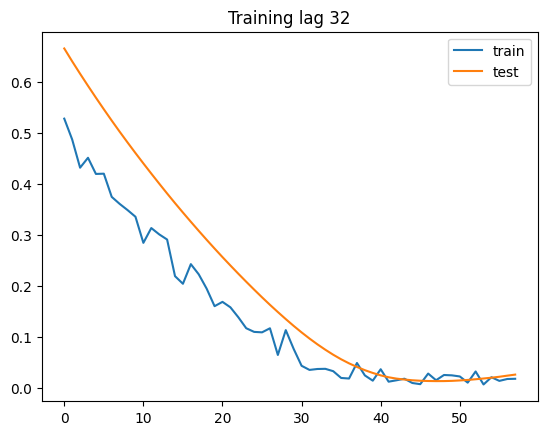

1/1 [==============================] - 0s 309ms/step
(8, 1)
Mean Square Error      = 208.70691890236236
Root Mean Square Error = 14.446692317010228
Mean Absolute Error    = 13.0369315702416
Median Absolute Error  = 11.8993175771156
R^2                    = 0.5968741421615578
Adjusted R^2           = -1.8218810048690957
RMSE: 208.70691890236236
R2_score: 0.5968741421615578


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.3168 - val_loss: 0.6587
Epoch 2/500
1/1 [==============================] - 0s 71ms/step - loss: 0.2853 - val_loss: 0.6332
Epoch 3/500
1/1 [==============================] - 0s 66ms/step - loss: 0.3089 - val_loss: 0.6082
Epoch 4/500
1/1 [==============================] - 0s 66ms/step - loss: 0.2846 - val_loss: 0.5840
Epoch 5/500
1/1 [==============================] - 0s 72ms/step - loss: 0.2742 - val_loss: 0.5601
Epoch 6/500
1/1 [==============================] - 0s 65ms/step - loss: 0.2609 - val_loss: 0.5362
Epoch 7/500
1/1 [==============================] - 0s 63ms/step - loss: 0.2600 - val_loss: 0.5127
Epoch 8/500
1/1 [==============================] - 0s 69ms/step - loss: 0.2418 - val_loss: 0.4896
Epoch 9/500
1/1 [==============================] - 0s 70ms/step - loss: 0.2200 - val_loss: 0.4668
Epoch 10/500
1/1 [==============================] - 0s 61ms/step - loss: 0.2303 - val_loss: 0.4441
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



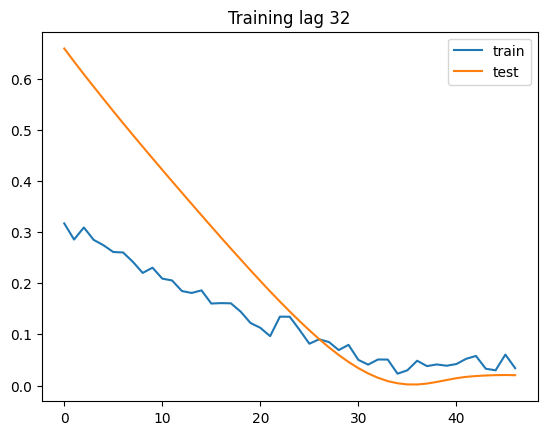

1/1 [==============================] - 0s 313ms/step
(8, 1)
Mean Square Error      = 229.72583776598563
Root Mean Square Error = 15.15670933171134
Mean Absolute Error    = 13.790434051249274
Median Absolute Error  = 14.789884716100914
R^2                    = 0.32452659967427444
Adjusted R^2           = -3.728313802280079
RMSE: 229.72583776598563
R2_score: 0.32452659967427444


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.2750 - val_loss: 0.4964
Epoch 2/500
1/1 [==============================] - 0s 68ms/step - loss: 0.2505 - val_loss: 0.4725
Epoch 3/500
1/1 [==============================] - 0s 59ms/step - loss: 0.2446 - val_loss: 0.4493
Epoch 4/500
1/1 [==============================] - 0s 66ms/step - loss: 0.2240 - val_loss: 0.4266
Epoch 5/500
1/1 [==============================] - 0s 61ms/step - loss: 0.2252 - val_loss: 0.4045
Epoch 6/500
1/1 [==============================] - 0s 61ms/step - loss: 0.2168 - val_loss: 0.3830
Epoch 7/500
1/1 [==============================] - 0s 62ms/step - loss: 0.1946 - val_loss: 0.3622
Epoch 8/500
1/1 [==============================] - 0s 61ms/step - loss: 0.1991 - val_loss: 0.3419
Epoch 9/500
1/1 [==============================] - 0s 62ms/step - loss: 0.1770 - val_loss: 0.3221
Epoch 10/500
1/1 [==============================] - 0s 71ms/step - loss: 0.1533 - val_loss: 0.3029
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



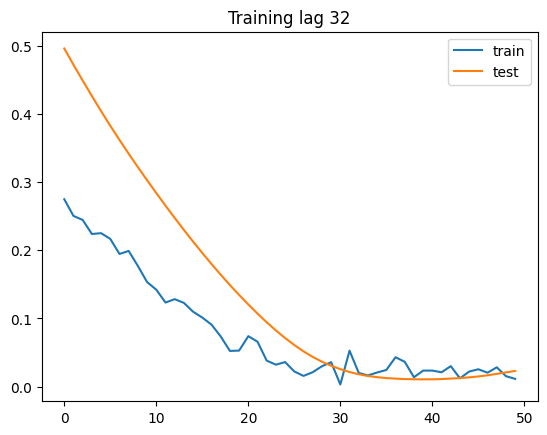

1/1 [==============================] - 0s 278ms/step
(8, 1)
Mean Square Error      = 169.1686473881989
Root Mean Square Error = 13.006484820588494
Mean Absolute Error    = 10.410087402809008
Median Absolute Error  = 8.514606604436516
R^2                    = 0.5980647280644
Adjusted R^2           = -1.8135469035491998
RMSE: 169.1686473881989
R2_score: 0.5980647280644


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.2925 - val_loss: 0.4077
Epoch 2/500
1/1 [==============================] - 0s 74ms/step - loss: 0.2491 - val_loss: 0.3901
Epoch 3/500
1/1 [==============================] - 0s 67ms/step - loss: 0.2529 - val_loss: 0.3728
Epoch 4/500
1/1 [==============================] - 0s 62ms/step - loss: 0.2418 - val_loss: 0.3558
Epoch 5/500
1/1 [==============================] - 0s 61ms/step - loss: 0.2272 - val_loss: 0.3390
Epoch 6/500
1/1 [==============================] - 0s 62ms/step - loss: 0.2047 - val_loss: 0.3225
Epoch 7/500
1/1 [==============================] - 0s 63ms/step - loss: 0.2251 - val_loss: 0.3061
Epoch 8/500
1/1 [==============================] - 0s 62ms/step - loss: 0.1979 - val_loss: 0.2900
Epoch 9/500
1/1 [==============================] - 0s 62ms/step - loss: 0.1967 - val_loss: 0.2741
Epoch 10/500
1/1 [==============================] - 0s 72ms/step - loss: 0.1773 - val_loss: 0.2585
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



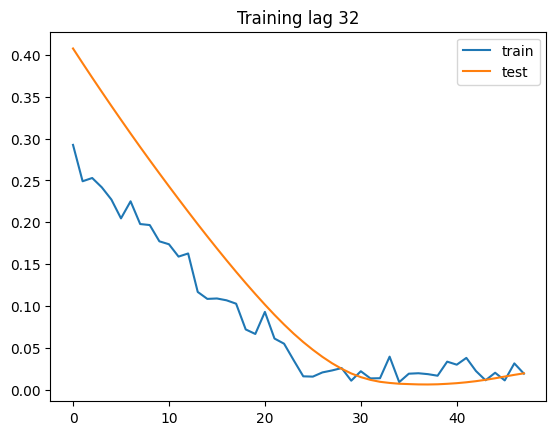

1/1 [==============================] - 0s 291ms/step
(8, 1)
Mean Square Error      = 166.56742941358127
Root Mean Square Error = 12.906100472783454
Mean Absolute Error    = 11.044012942375726
Median Absolute Error  = 11.529735046459479
R^2                    = 0.6577802796846564
Adjusted R^2           = -1.3955380422074055
RMSE: 166.56742941358127
R2_score: 0.6577802796846564


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.2236 - val_loss: 0.4312
Epoch 2/500
1/1 [==============================] - 0s 71ms/step - loss: 0.2205 - val_loss: 0.4088
Epoch 3/500
1/1 [==============================] - 0s 66ms/step - loss: 0.2374 - val_loss: 0.3869
Epoch 4/500
1/1 [==============================] - 0s 68ms/step - loss: 0.2126 - val_loss: 0.3654
Epoch 5/500
1/1 [==============================] - 0s 68ms/step - loss: 0.1885 - val_loss: 0.3444
Epoch 6/500
1/1 [==============================] - 0s 64ms/step - loss: 0.1922 - val_loss: 0.3239
Epoch 7/500
1/1 [==============================] - 0s 62ms/step - loss: 0.2038 - val_loss: 0.3038
Epoch 8/500
1/1 [==============================] - 0s 70ms/step - loss: 0.1782 - val_loss: 0.2840
Epoch 9/500
1/1 [==============================] - 0s 67ms/step - loss: 0.1513 - val_loss: 0.2646
Epoch 10/500
1/1 [==============================] - 0s 70ms/step - loss: 0.1592 - val_loss: 0.2457
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



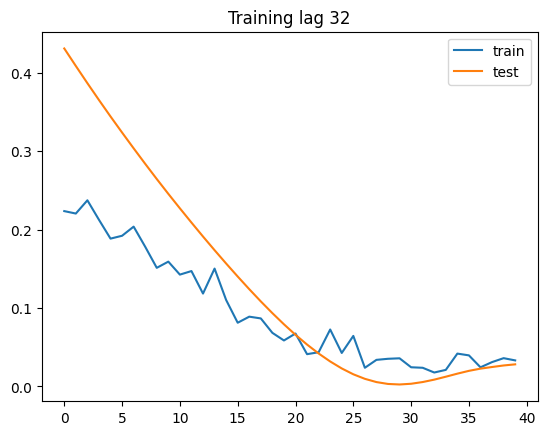

1/1 [==============================] - 0s 287ms/step
(8, 1)
Mean Square Error      = 406.07426109841686
Root Mean Square Error = 20.151284353569547
Mean Absolute Error    = 18.843644298373825
Median Absolute Error  = 19.048267310304972
R^2                    = -0.018862857205061978
Adjusted R^2           = -6.132040000435434
RMSE: 406.07426109841686
R2_score: -0.018862857205061978


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
6/6 [==============================] - 2s 86ms/step - loss: 0.0643 - val_loss: 0.0426
Epoch 2/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0328 - val_loss: 0.0633
Epoch 3/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0425 - val_loss: 0.0739
Epoch 4/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0401 - val_loss: 0.0508
Epoch 5/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0346 - val_loss: 0.0301
Epoch 6/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0256 - val_loss: 0.0214
Epoch 7/500
6/6 [==============================] - 0s 24ms/step - loss: 0.0220 - val_loss: 0.0170
Epoch 8/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0195 - val_loss: 0.0152
Epoch 9/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 10/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0191 - val_loss: 0.0127
Epoch 11/500
6/6 [=

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



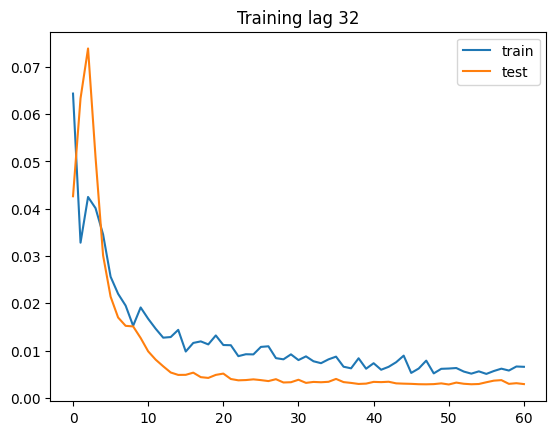

3/3 [==============================] - 0s 5ms/step
(78, 1)
Mean Square Error      = 4968916.7207
Root Mean Square Error = 2229.1067091326067
Mean Absolute Error    = 1811.7824944202318
Median Absolute Error  = 1667.8996672230132
R^2                    = 0.9681275568050735
Adjusted R^2           = 0.9654341109012768
RMSE: 4968916.7207
R2_score: 0.9681275568050735


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
4/4 [==============================] - 2s 136ms/step - loss: 0.1240 - val_loss: 0.1741
Epoch 2/500
4/4 [==============================] - 0s 31ms/step - loss: 0.0671 - val_loss: 0.1088
Epoch 3/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0378 - val_loss: 0.0748
Epoch 4/500
4/4 [==============================] - 0s 31ms/step - loss: 0.0379 - val_loss: 0.0652
Epoch 5/500
4/4 [==============================] - 0s 32ms/step - loss: 0.0328 - val_loss: 0.0658
Epoch 6/500
4/4 [==============================] - 0s 32ms/step - loss: 0.0392 - val_loss: 0.0645
Epoch 7/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0352 - val_loss: 0.0587
Epoch 8/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0276 - val_loss: 0.0507
Epoch 9/500
4/4 [==============================] - 0s 29ms/step - loss: 0.0236 - val_loss: 0.0446
Epoch 10/500
4/4 [==============================] - 0s 29ms/step - loss: 0.0236 - val_loss: 0.0423
Epoch 11/500
4/4 [

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



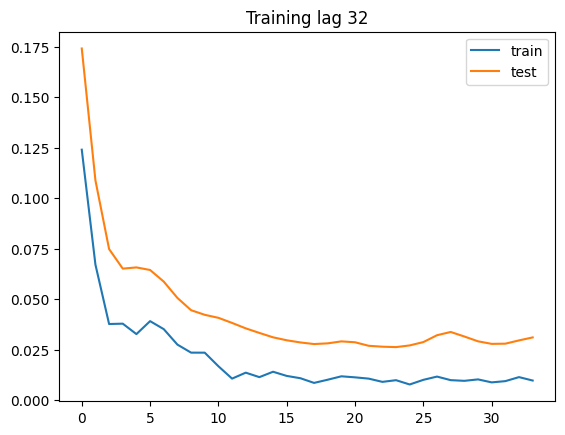

2/2 [==============================] - 0s 6ms/step
(53, 1)
Mean Square Error      = 34234373.5634416
Root Mean Square Error = 5851.0147464727515
Mean Absolute Error    = 4369.988515328128
Median Absolute Error  = 2840.6375358900113
R^2                    = 0.46647074622705254
Adjusted R^2           = 0.39687997399579855
RMSE: 34234373.5634416
R2_score: 0.46647074622705254


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
6/6 [==============================] - 2s 86ms/step - loss: 0.2764 - val_loss: 0.1513
Epoch 2/500
6/6 [==============================] - 0s 22ms/step - loss: 0.1118 - val_loss: 0.0589
Epoch 3/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0464 - val_loss: 0.0719
Epoch 4/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0431 - val_loss: 0.1181
Epoch 5/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0544 - val_loss: 0.1348
Epoch 6/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0665 - val_loss: 0.1189
Epoch 7/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0429 - val_loss: 0.0967
Epoch 8/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0489 - val_loss: 0.0747
Epoch 9/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0435 - val_loss: 0.0625
Epoch 10/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0369 - val_loss: 0.0589
Epoch 11/500
6/6 [=

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



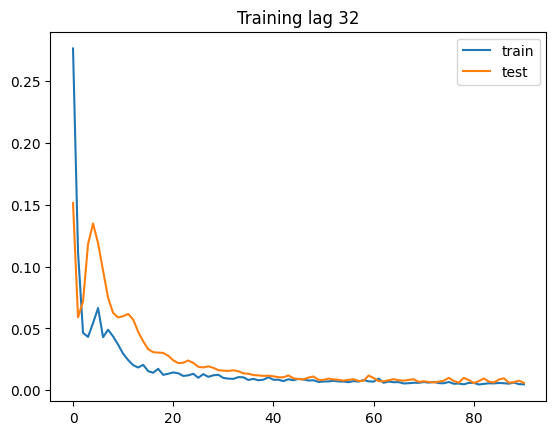

3/3 [==============================] - 0s 5ms/step
(80, 1)
Mean Square Error      = 77346634.25851649
Root Mean Square Error = 8794.693528402027
Mean Absolute Error    = 6764.681204676014
Median Absolute Error  = 5731.218133460876
R^2                    = 0.8931366053013116
Adjusted R^2           = 0.8843533125863509
RMSE: 77346634.25851649
R2_score: 0.8931366053013116


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
4/4 [==============================] - 3s 138ms/step - loss: 0.4205 - val_loss: 0.4312
Epoch 2/500
4/4 [==============================] - 0s 32ms/step - loss: 0.2650 - val_loss: 0.2712
Epoch 3/500
4/4 [==============================] - 0s 31ms/step - loss: 0.1693 - val_loss: 0.1695
Epoch 4/500
4/4 [==============================] - 0s 32ms/step - loss: 0.0956 - val_loss: 0.1178
Epoch 5/500
4/4 [==============================] - 0s 31ms/step - loss: 0.0642 - val_loss: 0.1041
Epoch 6/500
4/4 [==============================] - 0s 32ms/step - loss: 0.0482 - val_loss: 0.1126
Epoch 7/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0529 - val_loss: 0.1246
Epoch 8/500
4/4 [==============================] - 0s 31ms/step - loss: 0.0664 - val_loss: 0.1285
Epoch 9/500
4/4 [==============================] - 0s 32ms/step - loss: 0.0609 - val_loss: 0.1240
Epoch 10/500
4/4 [==============================] - 0s 31ms/step - loss: 0.0516 - val_loss: 0.1149
Epoch 11/500
4/4 [

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



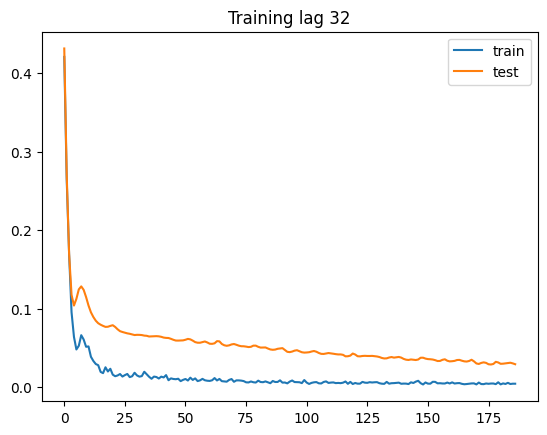

2/2 [==============================] - 0s 6ms/step
(53, 1)
Mean Square Error      = 38928084.77599037
Root Mean Square Error = 6239.2375155935815
Mean Absolute Error    = 4918.360588555557
Median Absolute Error  = 3894.117494500846
R^2                    = 0.439965817754847
Adjusted R^2           = 0.36691788094026184
RMSE: 38928084.77599037
R2_score: 0.439965817754847


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
4/4 [==============================] - 2s 146ms/step - loss: 0.3068 - val_loss: 0.4001
Epoch 2/500
4/4 [==============================] - 0s 30ms/step - loss: 0.2270 - val_loss: 0.2546
Epoch 3/500
4/4 [==============================] - 0s 31ms/step - loss: 0.1146 - val_loss: 0.1545
Epoch 4/500
4/4 [==============================] - 0s 32ms/step - loss: 0.0690 - val_loss: 0.0968
Epoch 5/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0526 - val_loss: 0.0747
Epoch 6/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0436 - val_loss: 0.0755
Epoch 7/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0572 - val_loss: 0.0790
Epoch 8/500
4/4 [==============================] - 0s 32ms/step - loss: 0.0577 - val_loss: 0.0746
Epoch 9/500
4/4 [==============================] - 0s 32ms/step - loss: 0.0496 - val_loss: 0.0664
Epoch 10/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0524 - val_loss: 0.0592
Epoch 11/500
4/4 [

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



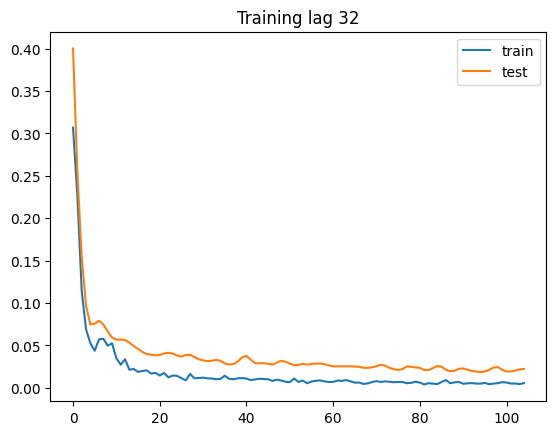

2/2 [==============================] - 0s 6ms/step
(53, 1)
Mean Square Error      = 24800765.168601125
Root Mean Square Error = 4980.036663379209
Mean Absolute Error    = 3934.2924096313996
Median Absolute Error  = 3077.7474248985673
R^2                    = 0.6525023589602224
Adjusted R^2           = 0.6071765796941644
RMSE: 24800765.168601125
R2_score: 0.6525023589602224


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.5353 - val_loss: 0.5233
Epoch 2/500
1/1 [==============================] - 0s 71ms/step - loss: 0.4590 - val_loss: 0.4976
Epoch 3/500
1/1 [==============================] - 0s 85ms/step - loss: 0.4548 - val_loss: 0.4727
Epoch 4/500
1/1 [==============================] - 0s 73ms/step - loss: 0.4310 - val_loss: 0.4482
Epoch 5/500
1/1 [==============================] - 0s 64ms/step - loss: 0.4496 - val_loss: 0.4242
Epoch 6/500
1/1 [==============================] - 0s 66ms/step - loss: 0.4055 - val_loss: 0.4006
Epoch 7/500
1/1 [==============================] - 0s 78ms/step - loss: 0.3904 - val_loss: 0.3775
Epoch 8/500
1/1 [==============================] - 0s 89ms/step - loss: 0.3895 - val_loss: 0.3550
Epoch 9/500
1/1 [==============================] - 0s 65ms/step - loss: 0.3590 - val_loss: 0.3328
Epoch 10/500
1/1 [==============================] - 0s 67ms/step - loss: 0.3042 - val_loss: 0.3112
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



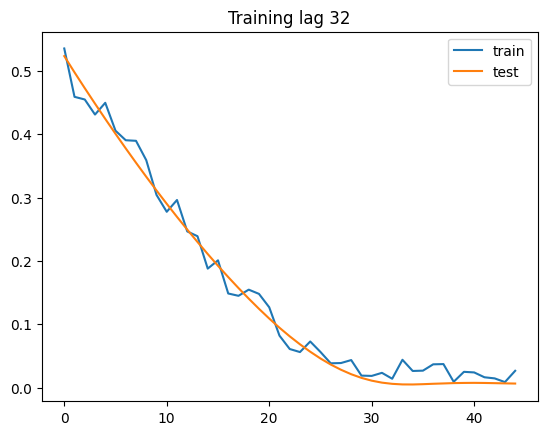

1/1 [==============================] - 0s 293ms/step
(8, 1)
Mean Square Error      = 25.689101916152094
Root Mean Square Error = 5.06844176410779
Mean Absolute Error    = 4.1978104662372395
Median Absolute Error  = 5.00040990415183
R^2                    = 0.8381961306463972
Adjusted R^2           = -0.13262708547521962
RMSE: 25.689101916152094
R2_score: 0.8381961306463972


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.4209 - val_loss: 0.6041
Epoch 2/500
1/1 [==============================] - 0s 90ms/step - loss: 0.3680 - val_loss: 0.5819
Epoch 3/500
1/1 [==============================] - 0s 75ms/step - loss: 0.3479 - val_loss: 0.5600
Epoch 4/500
1/1 [==============================] - 0s 65ms/step - loss: 0.3228 - val_loss: 0.5387
Epoch 5/500
1/1 [==============================] - 0s 71ms/step - loss: 0.3340 - val_loss: 0.5177
Epoch 6/500
1/1 [==============================] - 0s 72ms/step - loss: 0.3211 - val_loss: 0.4971
Epoch 7/500
1/1 [==============================] - 0s 93ms/step - loss: 0.3021 - val_loss: 0.4769
Epoch 8/500
1/1 [==============================] - 0s 72ms/step - loss: 0.2864 - val_loss: 0.4568
Epoch 9/500
1/1 [==============================] - 0s 72ms/step - loss: 0.2942 - val_loss: 0.4369
Epoch 10/500
1/1 [==============================] - 0s 67ms/step - loss: 0.2538 - val_loss: 0.4172
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



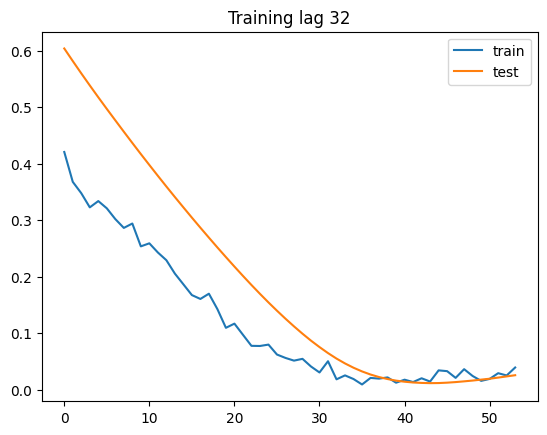

1/1 [==============================] - 0s 280ms/step
(8, 1)
Mean Square Error      = 231.630109106558
Root Mean Square Error = 15.219399104647923
Mean Absolute Error    = 13.268551236316336
Median Absolute Error  = 14.345116692505506
R^2                    = 0.5758882710976726
Adjusted R^2           = -1.968782102316292
RMSE: 231.630109106558
R2_score: 0.5758882710976726


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.2492 - val_loss: 0.3589
Epoch 2/500
1/1 [==============================] - 0s 74ms/step - loss: 0.2234 - val_loss: 0.3376
Epoch 3/500
1/1 [==============================] - 0s 72ms/step - loss: 0.2443 - val_loss: 0.3169
Epoch 4/500
1/1 [==============================] - 0s 63ms/step - loss: 0.1803 - val_loss: 0.2966
Epoch 5/500
1/1 [==============================] - 0s 66ms/step - loss: 0.1602 - val_loss: 0.2768
Epoch 6/500
1/1 [==============================] - 0s 65ms/step - loss: 0.1816 - val_loss: 0.2576
Epoch 7/500
1/1 [==============================] - 0s 66ms/step - loss: 0.1728 - val_loss: 0.2388
Epoch 8/500
1/1 [==============================] - 0s 64ms/step - loss: 0.1251 - val_loss: 0.2206
Epoch 9/500
1/1 [==============================] - 0s 65ms/step - loss: 0.1423 - val_loss: 0.2028
Epoch 10/500
1/1 [==============================] - 0s 66ms/step - loss: 0.1281 - val_loss: 0.1855
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



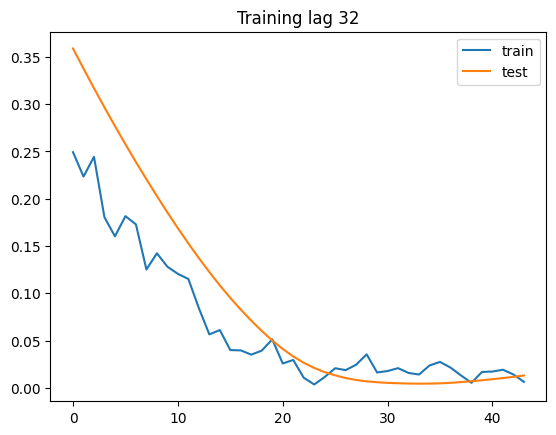

1/1 [==============================] - 0s 280ms/step
(8, 1)
Mean Square Error      = 90.70262015216355
Root Mean Square Error = 9.52379231987781
Mean Absolute Error    = 8.2045664646467
Median Absolute Error  = 7.502311689055944
R^2                    = 0.7521582734303534
Adjusted R^2           = -0.7348920859875265
RMSE: 90.70262015216355
R2_score: 0.7521582734303534


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
6/6 [==============================] - 2s 88ms/step - loss: 0.1604 - val_loss: 0.1175
Epoch 2/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0915 - val_loss: 0.0611
Epoch 3/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0465 - val_loss: 0.0718
Epoch 4/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0607 - val_loss: 0.0830
Epoch 5/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0635 - val_loss: 0.0708
Epoch 6/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0551 - val_loss: 0.0517
Epoch 7/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0432 - val_loss: 0.0417
Epoch 8/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0312 - val_loss: 0.0372
Epoch 9/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0295 - val_loss: 0.0338
Epoch 10/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0245 - val_loss: 0.0313
Epoch 11/500
6/6 [=

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



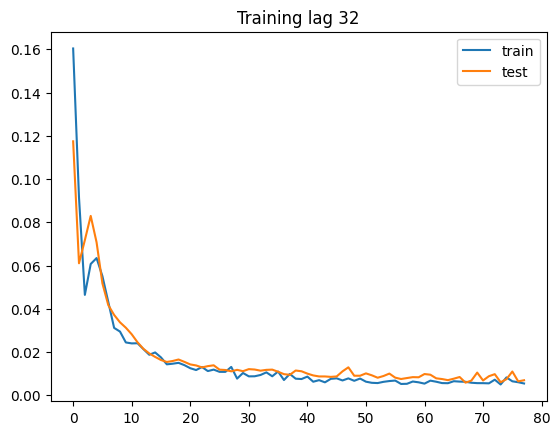

3/3 [==============================] - 0s 5ms/step
(80, 1)
Mean Square Error      = 79114279.78084421
Root Mean Square Error = 8894.620834012218
Mean Absolute Error    = 6919.682237019806
Median Absolute Error  = 4874.610906251706
R^2                    = 0.8977611598158212
Adjusted R^2           = 0.8893579674719161
RMSE: 79114279.78084421
R2_score: 0.8977611598158212


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.4397 - val_loss: 0.6295
Epoch 2/500
1/1 [==============================] - 0s 67ms/step - loss: 0.4393 - val_loss: 0.6027
Epoch 3/500
1/1 [==============================] - 0s 62ms/step - loss: 0.3985 - val_loss: 0.5766
Epoch 4/500
1/1 [==============================] - 0s 67ms/step - loss: 0.3622 - val_loss: 0.5512
Epoch 5/500
1/1 [==============================] - 0s 71ms/step - loss: 0.3919 - val_loss: 0.5261
Epoch 6/500
1/1 [==============================] - 0s 78ms/step - loss: 0.3739 - val_loss: 0.5015
Epoch 7/500
1/1 [==============================] - 0s 67ms/step - loss: 0.3157 - val_loss: 0.4774
Epoch 8/500
1/1 [==============================] - 0s 62ms/step - loss: 0.3047 - val_loss: 0.4537
Epoch 9/500
1/1 [==============================] - 0s 68ms/step - loss: 0.3297 - val_loss: 0.4304
Epoch 10/500
1/1 [==============================] - 0s 70ms/step - loss: 0.3045 - val_loss: 0.4075
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



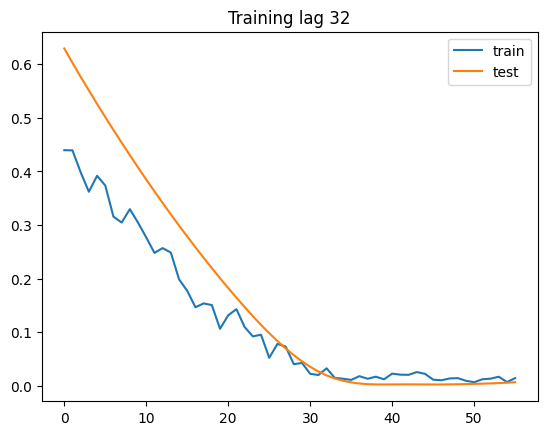

1/1 [==============================] - 0s 301ms/step
(8, 1)
Mean Square Error      = 22.81798068622006
Root Mean Square Error = 4.776817003635377
Mean Absolute Error    = 4.100193707216061
Median Absolute Error  = 3.4819546109712434
R^2                    = 0.7996344137017877
Adjusted R^2           = -0.4025591040874863
RMSE: 22.81798068622006
R2_score: 0.7996344137017877


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
5/5 [==============================] - 2s 111ms/step - loss: 0.1678 - val_loss: 0.2220
Epoch 2/500
5/5 [==============================] - 0s 25ms/step - loss: 0.0355 - val_loss: 0.1301
Epoch 3/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0396 - val_loss: 0.1202
Epoch 4/500
5/5 [==============================] - 0s 31ms/step - loss: 0.0547 - val_loss: 0.1153
Epoch 5/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0426 - val_loss: 0.1175
Epoch 6/500
5/5 [==============================] - 0s 25ms/step - loss: 0.0322 - val_loss: 0.1245
Epoch 7/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0312 - val_loss: 0.1252
Epoch 8/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0228 - val_loss: 0.1178
Epoch 9/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0261 - val_loss: 0.1085
Epoch 10/500
5/5 [==============================] - 0s 25ms/step - loss: 0.0217 - val_loss: 0.1014
Epoch 11/500
5/5 [

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



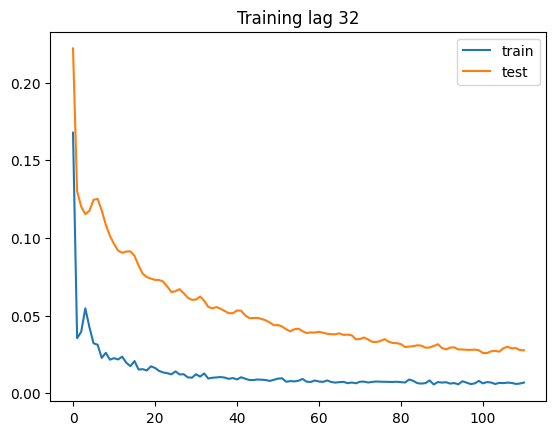

3/3 [==============================] - 0s 3ms/step
(67, 1)
Mean Square Error      = 33869614.6485375
Root Mean Square Error = 5819.760703717766
Mean Absolute Error    = 4304.924174490011
Median Absolute Error  = 3022.1410632929037
R^2                    = 0.6436299564821206
Adjusted R^2           = 0.6079929521303327
RMSE: 33869614.6485375
R2_score: 0.6436299564821206


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 0.3815 - val_loss: 0.5771
Epoch 2/500
1/1 [==============================] - 0s 79ms/step - loss: 0.3583 - val_loss: 0.5505
Epoch 3/500
1/1 [==============================] - 0s 78ms/step - loss: 0.3129 - val_loss: 0.5249
Epoch 4/500
1/1 [==============================] - 0s 70ms/step - loss: 0.3089 - val_loss: 0.4999
Epoch 5/500
1/1 [==============================] - 0s 74ms/step - loss: 0.2926 - val_loss: 0.4756
Epoch 6/500
1/1 [==============================] - 0s 66ms/step - loss: 0.2926 - val_loss: 0.4517
Epoch 7/500
1/1 [==============================] - 0s 83ms/step - loss: 0.2408 - val_loss: 0.4284
Epoch 8/500
1/1 [==============================] - 0s 74ms/step - loss: 0.2510 - val_loss: 0.4054
Epoch 9/500
1/1 [==============================] - 0s 72ms/step - loss: 0.2465 - val_loss: 0.3829
Epoch 10/500
1/1 [==============================] - 0s 73ms/step - loss: 0.2101 - val_loss: 0.3609
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



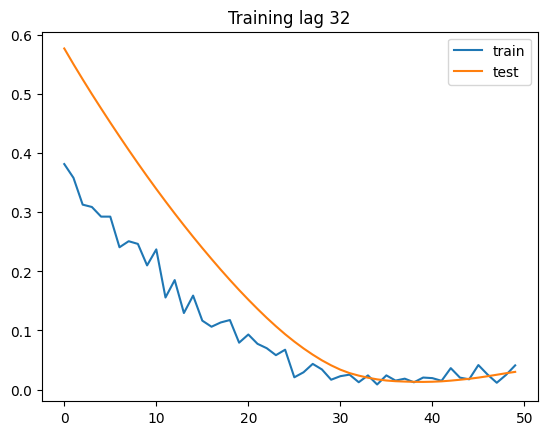

1/1 [==============================] - 0s 289ms/step
(8, 1)
Mean Square Error      = 248.81338427868204
Root Mean Square Error = 15.773819584320155
Mean Absolute Error    = 13.687003624511675
Median Absolute Error  = 15.75002464428043
R^2                    = 0.4538658992815964
Adjusted R^2           = -2.8229387050288253
RMSE: 248.81338427868204
R2_score: 0.4538658992815964


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
6/6 [==============================] - 2s 96ms/step - loss: 0.2035 - val_loss: 0.1689
Epoch 2/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1237 - val_loss: 0.0883
Epoch 3/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0731 - val_loss: 0.0598
Epoch 4/500
6/6 [==============================] - 0s 24ms/step - loss: 0.0598 - val_loss: 0.0593
Epoch 5/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0764 - val_loss: 0.0610
Epoch 6/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0760 - val_loss: 0.0548
Epoch 7/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0656 - val_loss: 0.0442
Epoch 8/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0563 - val_loss: 0.0358
Epoch 9/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0478 - val_loss: 0.0300
Epoch 10/500
6/6 [==============================] - 0s 24ms/step - loss: 0.0385 - val_loss: 0.0254
Epoch 11/500
6/6 [=

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



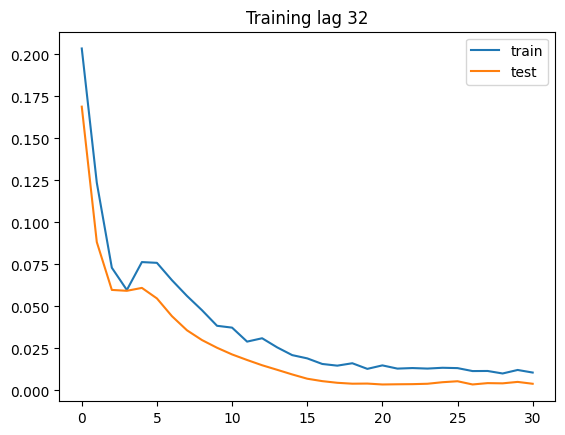

3/3 [==============================] - 0s 5ms/step
(78, 1)
Mean Square Error      = 8235173.550770801
Root Mean Square Error = 2869.699209110739
Mean Absolute Error    = 2312.1826618325085
Median Absolute Error  = 1944.0558029715503
R^2                    = 0.9427628887340642
Adjusted R^2           = 0.9379259497538442
RMSE: 8235173.550770801
R2_score: 0.9427628887340642


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
6/6 [==============================] - 2s 87ms/step - loss: 0.2191 - val_loss: 0.1237
Epoch 2/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0995 - val_loss: 0.0472
Epoch 3/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0638 - val_loss: 0.0533
Epoch 4/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0695 - val_loss: 0.0777
Epoch 5/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0656 - val_loss: 0.0792
Epoch 6/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0647 - val_loss: 0.0646
Epoch 7/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0565 - val_loss: 0.0508
Epoch 8/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0486 - val_loss: 0.0428
Epoch 9/500
6/6 [==============================] - 0s 24ms/step - loss: 0.0411 - val_loss: 0.0393
Epoch 10/500
6/6 [==============================] - 0s 24ms/step - loss: 0.0310 - val_loss: 0.0369
Epoch 11/500
6/6 [=

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



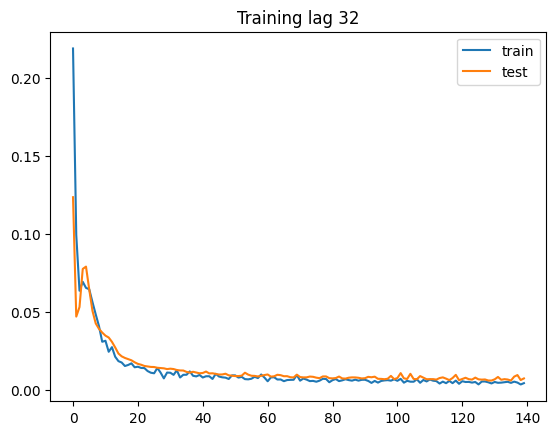

3/3 [==============================] - 0s 5ms/step
(80, 1)
Mean Square Error      = 92315235.23307347
Root Mean Square Error = 9608.081766568885
Mean Absolute Error    = 7122.664068375659
Median Absolute Error  = 6474.716119125864
R^2                    = 0.8755332669483786
Adjusted R^2           = 0.8653031245057796
RMSE: 92315235.23307347
R2_score: 0.8755332669483786


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.3394 - val_loss: 0.7014
Epoch 2/500
1/1 [==============================] - 0s 69ms/step - loss: 0.3334 - val_loss: 0.6735
Epoch 3/500
1/1 [==============================] - 0s 62ms/step - loss: 0.3358 - val_loss: 0.6462
Epoch 4/500
1/1 [==============================] - 0s 68ms/step - loss: 0.3118 - val_loss: 0.6195
Epoch 5/500
1/1 [==============================] - 0s 71ms/step - loss: 0.3092 - val_loss: 0.5930
Epoch 6/500
1/1 [==============================] - 0s 69ms/step - loss: 0.2842 - val_loss: 0.5674
Epoch 7/500
1/1 [==============================] - 0s 65ms/step - loss: 0.2579 - val_loss: 0.5421
Epoch 8/500
1/1 [==============================] - 0s 65ms/step - loss: 0.2764 - val_loss: 0.5173
Epoch 9/500
1/1 [==============================] - 0s 66ms/step - loss: 0.2604 - val_loss: 0.4930
Epoch 10/500
1/1 [==============================] - 0s 72ms/step - loss: 0.2599 - val_loss: 0.4690
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



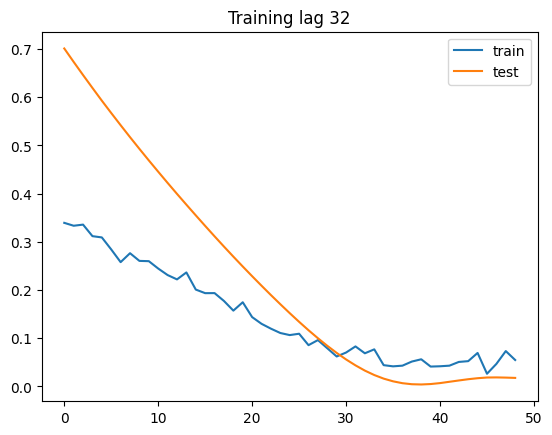

1/1 [==============================] - 0s 280ms/step
(8, 1)
Mean Square Error      = 262.3494273248343
Root Mean Square Error = 16.197204305831125
Mean Absolute Error    = 14.200658555392213
Median Absolute Error  = 13.244985316382085
R^2                    = 0.2620587146382469
Adjusted R^2           = -4.1655889975322715
RMSE: 262.3494273248343
R2_score: 0.2620587146382469


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.2741 - val_loss: 0.6076
Epoch 2/500
1/1 [==============================] - 0s 71ms/step - loss: 0.2932 - val_loss: 0.5799
Epoch 3/500
1/1 [==============================] - 0s 70ms/step - loss: 0.3097 - val_loss: 0.5534
Epoch 4/500
1/1 [==============================] - 0s 62ms/step - loss: 0.2422 - val_loss: 0.5275
Epoch 5/500
1/1 [==============================] - 0s 69ms/step - loss: 0.2382 - val_loss: 0.5021
Epoch 6/500
1/1 [==============================] - 0s 61ms/step - loss: 0.2431 - val_loss: 0.4772
Epoch 7/500
1/1 [==============================] - 0s 61ms/step - loss: 0.2312 - val_loss: 0.4527
Epoch 8/500
1/1 [==============================] - 0s 80ms/step - loss: 0.2238 - val_loss: 0.4287
Epoch 9/500
1/1 [==============================] - 0s 86ms/step - loss: 0.2148 - val_loss: 0.4052
Epoch 10/500
1/1 [==============================] - 0s 82ms/step - loss: 0.2250 - val_loss: 0.3824
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



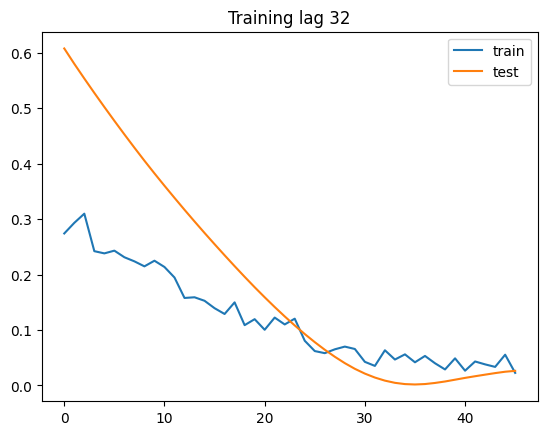

1/1 [==============================] - 0s 311ms/step
(8, 1)
Mean Square Error      = 390.8620817364016
Root Mean Square Error = 19.77023221250579
Mean Absolute Error    = 18.2563038556768
Median Absolute Error  = 17.905751403168537
R^2                    = -0.2203944803929374
Adjusted R^2           = -7.542761362750562
RMSE: 390.8620817364016
R2_score: -0.2203944803929374


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
5/5 [==============================] - 2s 105ms/step - loss: 0.3371 - val_loss: 0.3722
Epoch 2/500
5/5 [==============================] - 0s 27ms/step - loss: 0.1408 - val_loss: 0.1893
Epoch 3/500
5/5 [==============================] - 0s 27ms/step - loss: 0.1003 - val_loss: 0.1181
Epoch 4/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0508 - val_loss: 0.1119
Epoch 5/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0754 - val_loss: 0.1188
Epoch 6/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0703 - val_loss: 0.1148
Epoch 7/500
5/5 [==============================] - 0s 28ms/step - loss: 0.0723 - val_loss: 0.1019
Epoch 8/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0568 - val_loss: 0.0903
Epoch 9/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0518 - val_loss: 0.0829
Epoch 10/500
5/5 [==============================] - 0s 25ms/step - loss: 0.0435 - val_loss: 0.0778
Epoch 11/500
5/5 [

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



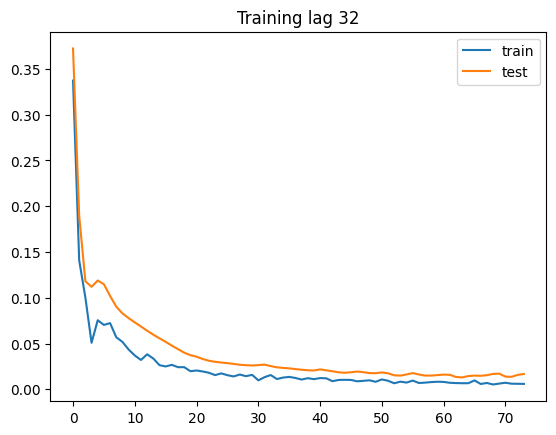

3/3 [==============================] - 0s 5ms/step
(69, 1)
Mean Square Error      = 20125905.262981962
Root Mean Square Error = 4486.190506764282
Mean Absolute Error    = 3432.0039064253124
Median Absolute Error  = 2609.5472541968265
R^2                    = 0.7545959505404755
Adjusted R^2           = 0.7308471715605215
RMSE: 20125905.262981962
R2_score: 0.7545959505404755


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.2769 - val_loss: 0.5250
Epoch 2/500
1/1 [==============================] - 0s 66ms/step - loss: 0.2915 - val_loss: 0.5027
Epoch 3/500
1/1 [==============================] - 0s 64ms/step - loss: 0.2931 - val_loss: 0.4808
Epoch 4/500
1/1 [==============================] - 0s 68ms/step - loss: 0.2869 - val_loss: 0.4589
Epoch 5/500
1/1 [==============================] - 0s 70ms/step - loss: 0.2540 - val_loss: 0.4372
Epoch 6/500
1/1 [==============================] - 0s 65ms/step - loss: 0.2426 - val_loss: 0.4158
Epoch 7/500
1/1 [==============================] - 0s 63ms/step - loss: 0.2542 - val_loss: 0.3946
Epoch 8/500
1/1 [==============================] - 0s 59ms/step - loss: 0.2356 - val_loss: 0.3737
Epoch 9/500
1/1 [==============================] - 0s 61ms/step - loss: 0.2305 - val_loss: 0.3530
Epoch 10/500
1/1 [==============================] - 0s 64ms/step - loss: 0.2032 - val_loss: 0.3325
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



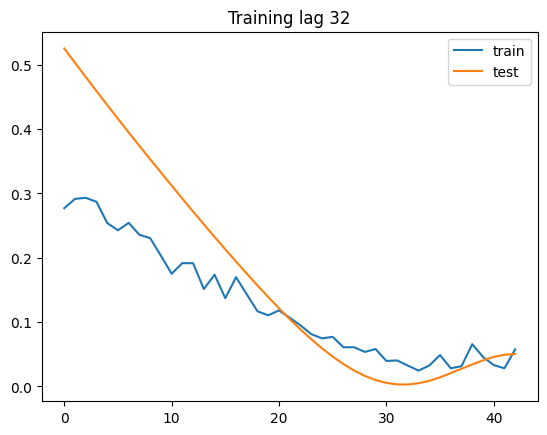

1/1 [==============================] - 0s 288ms/step
(8, 1)
Mean Square Error      = 738.4365447107646
Root Mean Square Error = 27.17418894301658
Mean Absolute Error    = 25.788549978878198
Median Absolute Error  = 26.08904781843944
R^2                    = -1.0528207072319766
Adjusted R^2           = -13.369744950623836
RMSE: 738.4365447107646
R2_score: -1.0528207072319766


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.2825 - val_loss: 0.4849
Epoch 2/500
1/1 [==============================] - 0s 73ms/step - loss: 0.2708 - val_loss: 0.4641
Epoch 3/500
1/1 [==============================] - 0s 71ms/step - loss: 0.2438 - val_loss: 0.4437
Epoch 4/500
1/1 [==============================] - 0s 74ms/step - loss: 0.2497 - val_loss: 0.4238
Epoch 5/500
1/1 [==============================] - 0s 68ms/step - loss: 0.2551 - val_loss: 0.4043
Epoch 6/500
1/1 [==============================] - 0s 66ms/step - loss: 0.2177 - val_loss: 0.3850
Epoch 7/500
1/1 [==============================] - 0s 72ms/step - loss: 0.2058 - val_loss: 0.3661
Epoch 8/500
1/1 [==============================] - 0s 68ms/step - loss: 0.1974 - val_loss: 0.3474
Epoch 9/500
1/1 [==============================] - 0s 67ms/step - loss: 0.1951 - val_loss: 0.3291
Epoch 10/500
1/1 [==============================] - 0s 76ms/step - loss: 0.1641 - val_loss: 0.3111
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



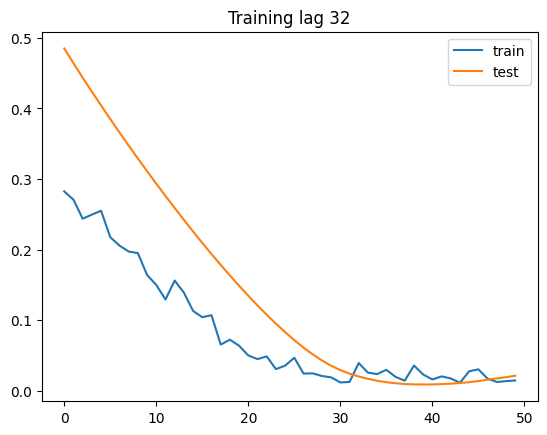

1/1 [==============================] - 0s 310ms/step
(8, 1)
Mean Square Error      = 202.61336545233712
Root Mean Square Error = 14.23423216939843
Mean Absolute Error    = 12.220712531712572
Median Absolute Error  = 13.370545753537662
R^2                    = 0.6158676061370245
Adjusted R^2           = -1.6889267570408284
RMSE: 202.61336545233712
R2_score: 0.6158676061370245


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
4/4 [==============================] - 3s 142ms/step - loss: 0.2934 - val_loss: 0.2945
Epoch 2/500
4/4 [==============================] - 0s 30ms/step - loss: 0.1810 - val_loss: 0.1820
Epoch 3/500
4/4 [==============================] - 0s 31ms/step - loss: 0.1087 - val_loss: 0.1111
Epoch 4/500
4/4 [==============================] - 0s 36ms/step - loss: 0.0749 - val_loss: 0.0744
Epoch 5/500
4/4 [==============================] - 0s 33ms/step - loss: 0.0521 - val_loss: 0.0629
Epoch 6/500
4/4 [==============================] - 0s 32ms/step - loss: 0.0469 - val_loss: 0.0653
Epoch 7/500
4/4 [==============================] - 0s 31ms/step - loss: 0.0460 - val_loss: 0.0715
Epoch 8/500
4/4 [==============================] - 0s 32ms/step - loss: 0.0533 - val_loss: 0.0733
Epoch 9/500
4/4 [==============================] - 0s 31ms/step - loss: 0.0483 - val_loss: 0.0688
Epoch 10/500
4/4 [==============================] - 0s 31ms/step - loss: 0.0444 - val_loss: 0.0603
Epoch 11/500
4/4 [

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



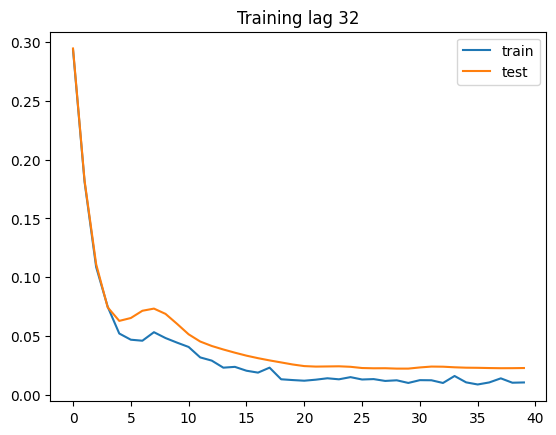

2/2 [==============================] - 0s 7ms/step
(53, 1)
Mean Square Error      = 28014407.172849476
Root Mean Square Error = 5292.863796929737
Mean Absolute Error    = 3881.800011215083
Median Absolute Error  = 2767.0217983413677
R^2                    = 0.5817229921288423
Adjusted R^2           = 0.5271651215369522
RMSE: 28014407.172849476
R2_score: 0.5817229921288423


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
6/6 [==============================] - 2s 88ms/step - loss: 0.1251 - val_loss: 0.1068
Epoch 2/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0741 - val_loss: 0.0551
Epoch 3/500
6/6 [==============================] - 0s 24ms/step - loss: 0.0432 - val_loss: 0.0497
Epoch 4/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0417 - val_loss: 0.0620
Epoch 5/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0479 - val_loss: 0.0602
Epoch 6/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0416 - val_loss: 0.0471
Epoch 7/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0342 - val_loss: 0.0361
Epoch 8/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0310 - val_loss: 0.0283
Epoch 9/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0233 - val_loss: 0.0235
Epoch 10/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0192 - val_loss: 0.0204
Epoch 11/500
6/6 [=

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



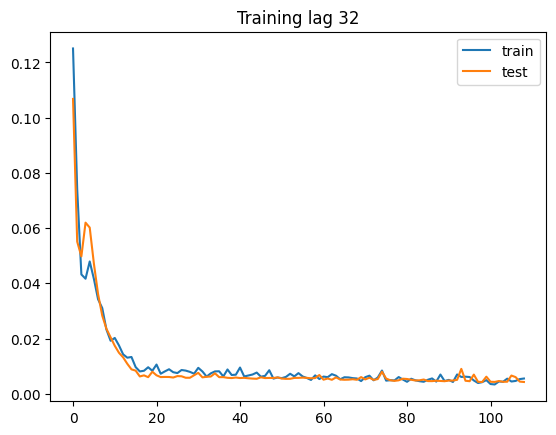

3/3 [==============================] - 0s 5ms/step
(78, 1)
Mean Square Error      = 8059403.740329664
Root Mean Square Error = 2838.9088996178907
Mean Absolute Error    = 2321.252842347972
Median Absolute Error  = 2106.5514269355117
R^2                    = 0.9454481633241897
Adjusted R^2           = 0.9408381489572198
RMSE: 8059403.740329664
R2_score: 0.9454481633241897


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
7/7 [==============================] - 2s 76ms/step - loss: 0.1837 - val_loss: 0.2026
Epoch 2/500
7/7 [==============================] - 0s 21ms/step - loss: 0.1038 - val_loss: 0.1285
Epoch 3/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0734 - val_loss: 0.1141
Epoch 4/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0711 - val_loss: 0.1129
Epoch 5/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0798 - val_loss: 0.1042
Epoch 6/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0714 - val_loss: 0.0943
Epoch 7/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0546 - val_loss: 0.0862
Epoch 8/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0437 - val_loss: 0.0793
Epoch 9/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0377 - val_loss: 0.0724
Epoch 10/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0263 - val_loss: 0.0655
Epoch 11/500
7/7 [=

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



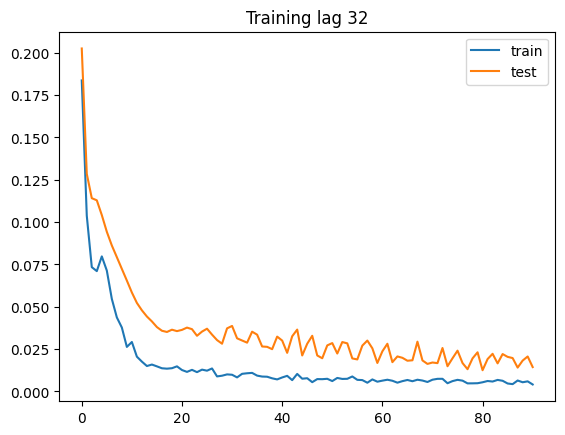

4/4 [==============================] - 0s 5ms/step
(97, 1)
Mean Square Error      = 42375202.58236579
Root Mean Square Error = 6509.623843384946
Mean Absolute Error    = 5579.151561936101
Median Absolute Error  = 4888.87640280326
R^2                    = 0.8584502118237913
Adjusted R^2           = 0.8490135592787108
RMSE: 42375202.58236579
R2_score: 0.8584502118237913


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
7/7 [==============================] - 2s 76ms/step - loss: 0.1944 - val_loss: 0.2069
Epoch 2/500
7/7 [==============================] - 0s 22ms/step - loss: 0.1096 - val_loss: 0.1503
Epoch 3/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0714 - val_loss: 0.1397
Epoch 4/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0582 - val_loss: 0.1415
Epoch 5/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0555 - val_loss: 0.1278
Epoch 6/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0505 - val_loss: 0.1039
Epoch 7/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0420 - val_loss: 0.0867
Epoch 8/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0267 - val_loss: 0.0765
Epoch 9/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0269 - val_loss: 0.0666
Epoch 10/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0200 - val_loss: 0.0574
Epoch 11/500
7/7 [=

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



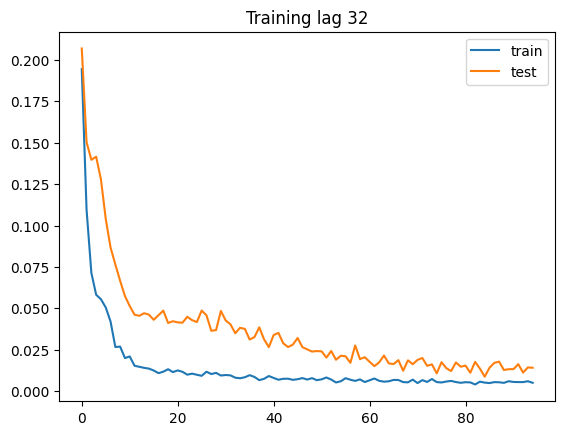

4/4 [==============================] - 0s 5ms/step
(97, 1)
Mean Square Error      = 37603921.532224156
Root Mean Square Error = 6132.203644060115
Mean Absolute Error    = 4814.658836105681
Median Absolute Error  = 3473.8744487072254
R^2                    = 0.8568156362683288
Adjusted R^2           = 0.8472700120195508
RMSE: 37603921.532224156
R2_score: 0.8568156362683288


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
4/4 [==============================] - 2s 153ms/step - loss: 0.2848 - val_loss: 0.3652
Epoch 2/500
4/4 [==============================] - 0s 31ms/step - loss: 0.1765 - val_loss: 0.2007
Epoch 3/500
4/4 [==============================] - 0s 32ms/step - loss: 0.0952 - val_loss: 0.1023
Epoch 4/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0398 - val_loss: 0.0560
Epoch 5/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0341 - val_loss: 0.0447
Epoch 6/500
4/4 [==============================] - 0s 37ms/step - loss: 0.0404 - val_loss: 0.0470
Epoch 7/500
4/4 [==============================] - 0s 31ms/step - loss: 0.0492 - val_loss: 0.0467
Epoch 8/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0453 - val_loss: 0.0411
Epoch 9/500
4/4 [==============================] - 0s 29ms/step - loss: 0.0328 - val_loss: 0.0356
Epoch 10/500
4/4 [==============================] - 0s 30ms/step - loss: 0.0342 - val_loss: 0.0334
Epoch 11/500
4/4 [

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



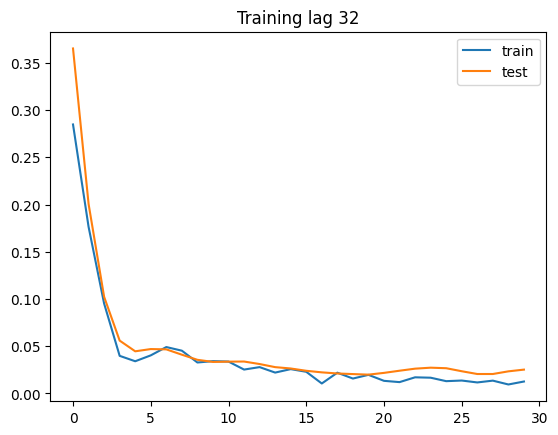

2/2 [==============================] - 0s 7ms/step
(53, 1)
Mean Square Error      = 27826634.599093277
Root Mean Square Error = 5275.095695728493
Mean Absolute Error    = 4204.866252213162
Median Absolute Error  = 3857.8583446008997
R^2                    = 0.5641693958381154
Adjusted R^2           = 0.5073219257300435
RMSE: 27826634.599093277
R2_score: 0.5641693958381154


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.3073 - val_loss: 0.5780
Epoch 2/500
1/1 [==============================] - 0s 67ms/step - loss: 0.3002 - val_loss: 0.5545
Epoch 3/500
1/1 [==============================] - 0s 61ms/step - loss: 0.3118 - val_loss: 0.5318
Epoch 4/500
1/1 [==============================] - 0s 60ms/step - loss: 0.2850 - val_loss: 0.5095
Epoch 5/500
1/1 [==============================] - 0s 60ms/step - loss: 0.2427 - val_loss: 0.4879
Epoch 6/500
1/1 [==============================] - 0s 62ms/step - loss: 0.2368 - val_loss: 0.4667
Epoch 7/500
1/1 [==============================] - 0s 69ms/step - loss: 0.2331 - val_loss: 0.4458
Epoch 8/500
1/1 [==============================] - 0s 63ms/step - loss: 0.2276 - val_loss: 0.4253
Epoch 9/500
1/1 [==============================] - 0s 61ms/step - loss: 0.2155 - val_loss: 0.4051
Epoch 10/500
1/1 [==============================] - 0s 62ms/step - loss: 0.2016 - val_loss: 0.3854
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



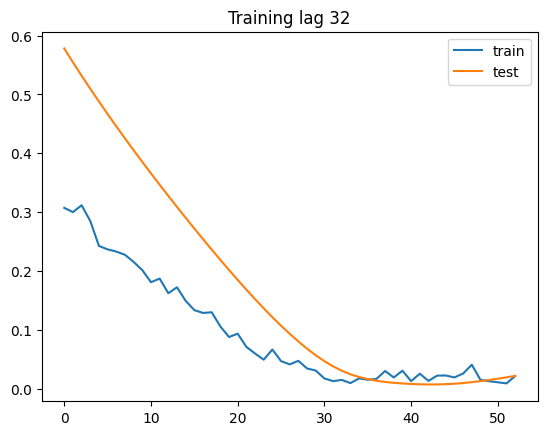

1/1 [==============================] - 0s 282ms/step
(8, 1)
Mean Square Error      = 191.24580678092474
Root Mean Square Error = 13.829165078952697
Mean Absolute Error    = 12.154612950668081
Median Absolute Error  = 13.011345839164939
R^2                    = 0.5487168685539668
Adjusted R^2           = -2.158981920122232
RMSE: 191.24580678092474
R2_score: 0.5487168685539668


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.2522 - val_loss: 0.5257
Epoch 2/500
1/1 [==============================] - 0s 69ms/step - loss: 0.2332 - val_loss: 0.4923
Epoch 3/500
1/1 [==============================] - 0s 60ms/step - loss: 0.2057 - val_loss: 0.4601
Epoch 4/500
1/1 [==============================] - 0s 63ms/step - loss: 0.2325 - val_loss: 0.4291
Epoch 5/500
1/1 [==============================] - 0s 69ms/step - loss: 0.1854 - val_loss: 0.3991
Epoch 6/500
1/1 [==============================] - 0s 61ms/step - loss: 0.1751 - val_loss: 0.3702
Epoch 7/500
1/1 [==============================] - 0s 71ms/step - loss: 0.1658 - val_loss: 0.3425
Epoch 8/500
1/1 [==============================] - 0s 84ms/step - loss: 0.1847 - val_loss: 0.3159
Epoch 9/500
1/1 [==============================] - 0s 70ms/step - loss: 0.1294 - val_loss: 0.2901
Epoch 10/500
1/1 [==============================] - 0s 65ms/step - loss: 0.1343 - val_loss: 0.2654
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



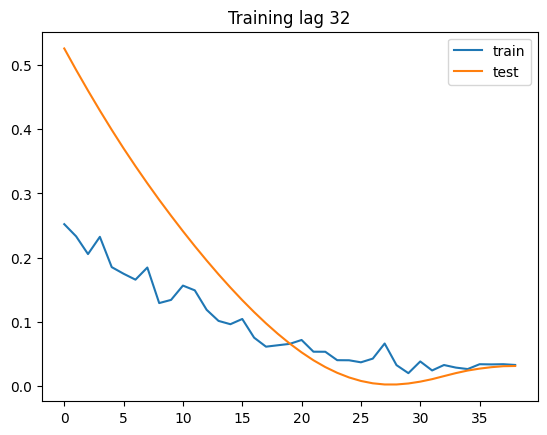

1/1 [==============================] - 0s 291ms/step
(8, 1)
Mean Square Error      = 363.9182784242542
Root Mean Square Error = 19.07664222090078
Mean Absolute Error    = 16.435813551079153
Median Absolute Error  = 15.656637378866954
R^2                    = -0.378748786277066
Adjusted R^2           = -8.651241503939461
RMSE: 363.9182784242542
R2_score: -0.378748786277066


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
6/6 [==============================] - 2s 90ms/step - loss: 0.4187 - val_loss: 0.4859
Epoch 2/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2717 - val_loss: 0.2912
Epoch 3/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1571 - val_loss: 0.1732
Epoch 4/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1067 - val_loss: 0.1222
Epoch 5/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0933 - val_loss: 0.1110
Epoch 6/500
6/6 [==============================] - 0s 20ms/step - loss: 0.0932 - val_loss: 0.1103
Epoch 7/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0842 - val_loss: 0.1055
Epoch 8/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1011 - val_loss: 0.0953
Epoch 9/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0838 - val_loss: 0.0852
Epoch 10/500
6/6 [==============================] - 0s 24ms/step - loss: 0.0772 - val_loss: 0.0771
Epoch 11/500
6/6 [=

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



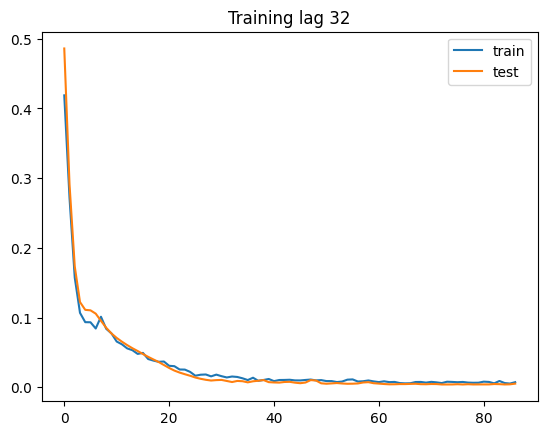

3/3 [==============================] - 1s 5ms/step
(78, 1)
Mean Square Error      = 9061422.524177717
Root Mean Square Error = 3010.2196803850907
Mean Absolute Error    = 2277.4071136659013
Median Absolute Error  = 1612.3593935587996
R^2                    = 0.934045055792321
Adjusted R^2           = 0.928471398535334
RMSE: 9061422.524177717
R2_score: 0.934045055792321


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
7/7 [==============================] - 2s 77ms/step - loss: 0.1962 - val_loss: 0.1379
Epoch 2/500
7/7 [==============================] - 0s 20ms/step - loss: 0.0899 - val_loss: 0.0768
Epoch 3/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0694 - val_loss: 0.0851
Epoch 4/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0804 - val_loss: 0.0772
Epoch 5/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0684 - val_loss: 0.0585
Epoch 6/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0580 - val_loss: 0.0467
Epoch 7/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0404 - val_loss: 0.0385
Epoch 8/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0423 - val_loss: 0.0313
Epoch 9/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0276 - val_loss: 0.0244
Epoch 10/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0241 - val_loss: 0.0195
Epoch 11/500
7/7 [=

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



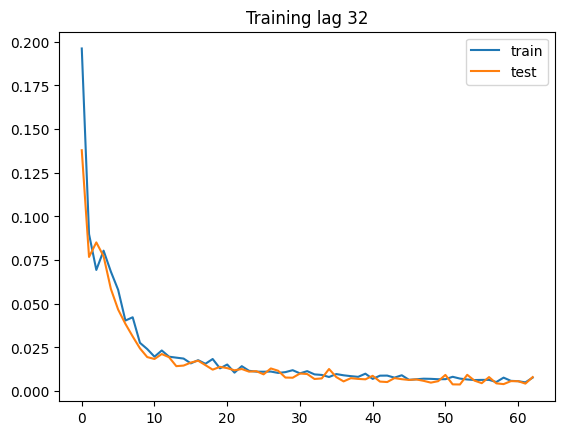

4/4 [==============================] - 0s 5ms/step
(97, 1)
Mean Square Error      = 23753983.82317701
Root Mean Square Error = 4873.80588689958
Mean Absolute Error    = 3805.2323240774176
Median Absolute Error  = 2954.7440332353144
R^2                    = 0.9072264797319128
Adjusted R^2           = 0.901041578380707
RMSE: 23753983.82317701
R2_score: 0.9072264797319128


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
7/7 [==============================] - 2s 79ms/step - loss: 0.0823 - val_loss: 0.0727
Epoch 2/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0333 - val_loss: 0.0368
Epoch 3/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0270 - val_loss: 0.0416
Epoch 4/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0287 - val_loss: 0.0397
Epoch 5/500
7/7 [==============================] - 0s 25ms/step - loss: 0.0236 - val_loss: 0.0257
Epoch 6/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0185 - val_loss: 0.0176
Epoch 7/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0159 - val_loss: 0.0139
Epoch 8/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0155 - val_loss: 0.0121
Epoch 9/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0128 - val_loss: 0.0121
Epoch 10/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0107 - val_loss: 0.0091
Epoch 11/500
7/7 [=

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



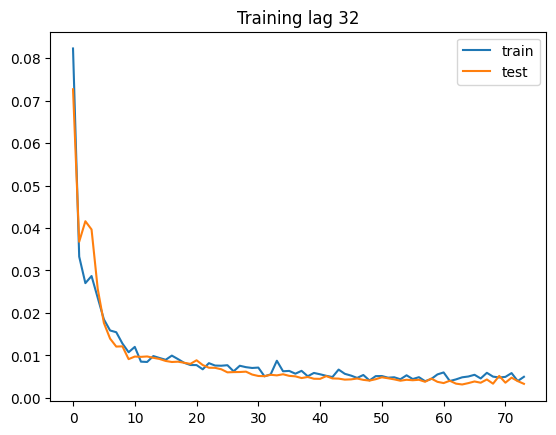

4/4 [==============================] - 0s 5ms/step
(97, 1)
Mean Square Error      = 10239316.675452499
Root Mean Square Error = 3199.8932287581874
Mean Absolute Error    = 2680.207829315861
Median Absolute Error  = 2397.7348606237647
R^2                    = 0.9629118297087698
Adjusted R^2           = 0.9604392850226877
RMSE: 10239316.675452499
R2_score: 0.9629118297087698


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.3564 - val_loss: 0.4842
Epoch 2/500
1/1 [==============================] - 0s 70ms/step - loss: 0.3482 - val_loss: 0.4626
Epoch 3/500
1/1 [==============================] - 0s 61ms/step - loss: 0.3396 - val_loss: 0.4414
Epoch 4/500
1/1 [==============================] - 0s 64ms/step - loss: 0.3033 - val_loss: 0.4207
Epoch 5/500
1/1 [==============================] - 0s 69ms/step - loss: 0.3111 - val_loss: 0.4004
Epoch 6/500
1/1 [==============================] - 0s 66ms/step - loss: 0.3085 - val_loss: 0.3803
Epoch 7/500
1/1 [==============================] - 0s 67ms/step - loss: 0.2648 - val_loss: 0.3605
Epoch 8/500
1/1 [==============================] - 0s 69ms/step - loss: 0.2366 - val_loss: 0.3410
Epoch 9/500
1/1 [==============================] - 0s 68ms/step - loss: 0.2377 - val_loss: 0.3218
Epoch 10/500
1/1 [==============================] - 0s 68ms/step - loss: 0.2343 - val_loss: 0.3030
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



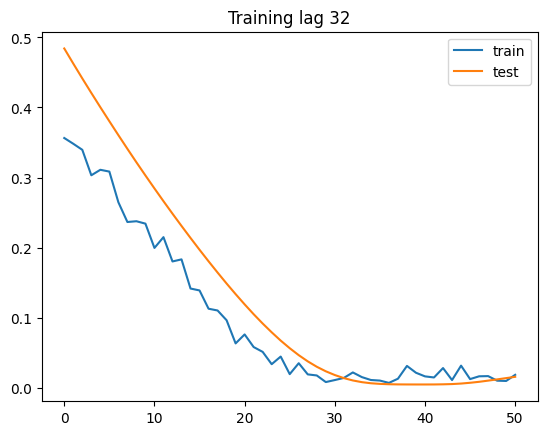

1/1 [==============================] - 0s 310ms/step
(8, 1)
Mean Square Error      = 113.74928375525813
Root Mean Square Error = 10.665330925726503
Mean Absolute Error    = 8.647456302525423
Median Absolute Error  = 7.521994749564222
R^2                    = 0.707186983819919
Adjusted R^2           = -1.0496911132605673
RMSE: 113.74928375525813
R2_score: 0.707186983819919


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
6/6 [==============================] - 2s 92ms/step - loss: 0.2417 - val_loss: 0.2619
Epoch 2/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1322 - val_loss: 0.2138
Epoch 3/500
6/6 [==============================] - 0s 27ms/step - loss: 0.0937 - val_loss: 0.2249
Epoch 4/500
6/6 [==============================] - 0s 24ms/step - loss: 0.0794 - val_loss: 0.2459
Epoch 5/500
6/6 [==============================] - 0s 26ms/step - loss: 0.0800 - val_loss: 0.2479
Epoch 6/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0813 - val_loss: 0.2289
Epoch 7/500
6/6 [==============================] - 0s 25ms/step - loss: 0.0634 - val_loss: 0.2053
Epoch 8/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0735 - val_loss: 0.1827
Epoch 9/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0628 - val_loss: 0.1676
Epoch 10/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0564 - val_loss: 0.1569
Epoch 11/500
6/6 [=

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



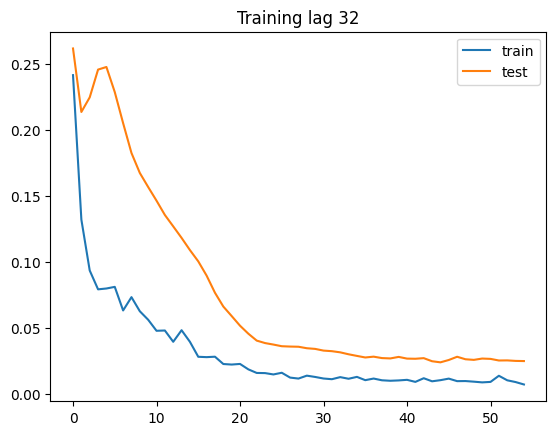

3/3 [==============================] - 0s 5ms/step
(80, 1)
Mean Square Error      = 34533448.8210184
Root Mean Square Error = 5876.516725154315
Mean Absolute Error    = 4031.3632632929903
Median Absolute Error  = 2305.7480579217154
R^2                    = 0.6994893575859717
Adjusted R^2           = 0.6747898527300242
RMSE: 34533448.8210184
R2_score: 0.6994893575859717


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.3219 - val_loss: 0.7784
Epoch 2/500
1/1 [==============================] - 0s 70ms/step - loss: 0.3064 - val_loss: 0.7439
Epoch 3/500
1/1 [==============================] - 0s 65ms/step - loss: 0.3096 - val_loss: 0.7104
Epoch 4/500
1/1 [==============================] - 0s 64ms/step - loss: 0.2843 - val_loss: 0.6777
Epoch 5/500
1/1 [==============================] - 0s 70ms/step - loss: 0.2808 - val_loss: 0.6456
Epoch 6/500
1/1 [==============================] - 0s 61ms/step - loss: 0.2830 - val_loss: 0.6145
Epoch 7/500
1/1 [==============================] - 0s 61ms/step - loss: 0.2589 - val_loss: 0.5838
Epoch 8/500
1/1 [==============================] - 0s 63ms/step - loss: 0.2521 - val_loss: 0.5538
Epoch 9/500
1/1 [==============================] - 0s 67ms/step - loss: 0.2442 - val_loss: 0.5244
Epoch 10/500
1/1 [==============================] - 0s 62ms/step - loss: 0.2200 - val_loss: 0.4954
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



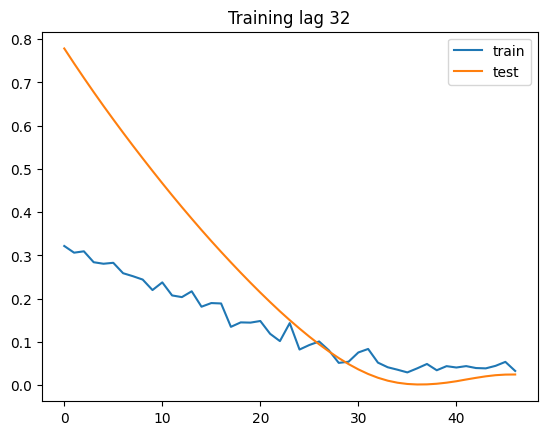

1/1 [==============================] - 0s 322ms/step
(8, 1)
Mean Square Error      = 361.9511268483414
Root Mean Square Error = 19.025013189176544
Mean Absolute Error    = 17.09670311531458
Median Absolute Error  = 19.738637665586282
R^2                    = -0.23991722860165976
Adjusted R^2           = -7.6794206002116185
RMSE: 361.9511268483414
R2_score: -0.23991722860165976


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
6/6 [==============================] - 2s 86ms/step - loss: 0.2339 - val_loss: 0.2150
Epoch 2/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0842 - val_loss: 0.1784
Epoch 3/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0587 - val_loss: 0.2170
Epoch 4/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0676 - val_loss: 0.2284
Epoch 5/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0671 - val_loss: 0.1949
Epoch 6/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0626 - val_loss: 0.1579
Epoch 7/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0569 - val_loss: 0.1365
Epoch 8/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0549 - val_loss: 0.1259
Epoch 9/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0403 - val_loss: 0.1225
Epoch 10/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0366 - val_loss: 0.1178
Epoch 11/500
6/6 [=

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



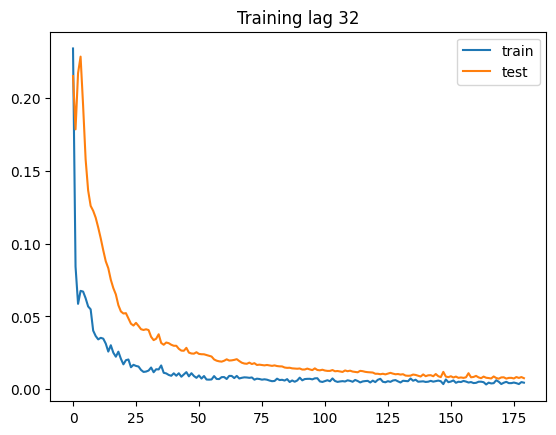

3/3 [==============================] - 0s 4ms/step
(80, 1)
Mean Square Error      = 8898526.942886626
Root Mean Square Error = 2983.0398828856823
Mean Absolute Error    = 2503.30495682988
Median Absolute Error  = 2264.0518407717245
R^2                    = 0.8946396375177592
Adjusted R^2           = 0.885979881697301
RMSE: 8898526.942886626
R2_score: 0.8946396375177592


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
5/5 [==============================] - 2s 116ms/step - loss: 0.1319 - val_loss: 0.1306
Epoch 2/500
5/5 [==============================] - 0s 25ms/step - loss: 0.0743 - val_loss: 0.0932
Epoch 3/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0423 - val_loss: 0.1029
Epoch 4/500
5/5 [==============================] - 0s 28ms/step - loss: 0.0388 - val_loss: 0.1277
Epoch 5/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0508 - val_loss: 0.1314
Epoch 6/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0476 - val_loss: 0.1175
Epoch 7/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0417 - val_loss: 0.0968
Epoch 8/500
5/5 [==============================] - 0s 25ms/step - loss: 0.0337 - val_loss: 0.0807
Epoch 9/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0276 - val_loss: 0.0714
Epoch 10/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0260 - val_loss: 0.0663
Epoch 11/500
5/5 [

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



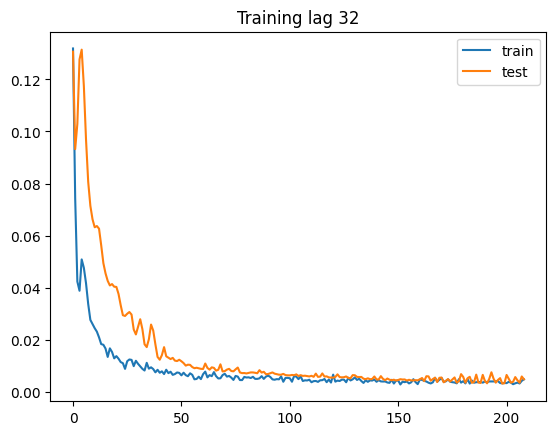

3/3 [==============================] - 0s 5ms/step
(69, 1)
Mean Square Error      = 6137068.006305741
Root Mean Square Error = 2477.3106398483296
Mean Absolute Error    = 1965.2181787268871
Median Absolute Error  = 1585.285408832875
R^2                    = 0.9303753786708295
Adjusted R^2           = 0.9236375120905872
RMSE: 6137068.006305741
R2_score: 0.9303753786708295


/tmp/ipykernel_63033/173551231.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_63033/173551231.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.3046 - val_loss: 0.3484
Epoch 2/500
1/1 [==============================] - 0s 72ms/step - loss: 0.3245 - val_loss: 0.3372
Epoch 3/500
1/1 [==============================] - 0s 66ms/step - loss: 0.2869 - val_loss: 0.3262
Epoch 4/500
1/1 [==============================] - 0s 62ms/step - loss: 0.3039 - val_loss: 0.3154
Epoch 5/500
1/1 [==============================] - 0s 60ms/step - loss: 0.2868 - val_loss: 0.3048
Epoch 6/500
1/1 [==============================] - 0s 57ms/step - loss: 0.2553 - val_loss: 0.2942
Epoch 7/500
1/1 [==============================] - 0s 57ms/step - loss: 0.2699 - val_loss: 0.2837
Epoch 8/500
1/1 [==============================] - 0s 71ms/step - loss: 0.2352 - val_loss: 0.2733
Epoch 9/500
1/1 [==============================] - 0s 69ms/step - loss: 0.2164 - val_loss: 0.2630
Epoch 10/500
1/1 [==============================] - 0s 76ms/step - loss: 0.2290 - val_loss: 0.2527
Epoch 11/500
1/1 [===

/home/jupyter-kty7613/.conda/envs/kty/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



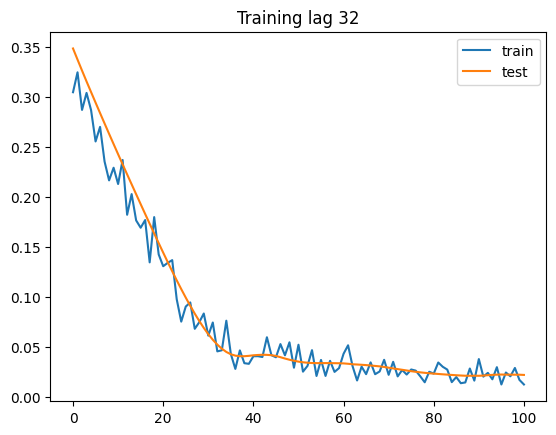

1/1 [==============================] - 1s 1s/step
(7, 1)


ZeroDivisionError: division by zero

In [331]:


for p in flist:
    df=fj_env.get_group(p)
    df=df.reindex(columns=["date","outtrn_cumsum",'HeatingEnergyUsage_cumsum',"inTp","outTp","inHd","inCo2","outWs","acSlrdQy","ec","ph",
                        "frtstGrupp","flanGrupp","frtstCo", 'tcdmt', 'frmhsFclu', 'hvstGrupp',
                        'grwtLt', 'fcluHg', 'lefLt', 'hvstCo', 'lefCunt',
                        'lefBt', 'stemThck', 'frmAr', 'frmDov'
                        ])
    df=df.set_index("date")
    dataset_train_actual = df.copy()
    dataset_train_actual.loc[dataset_train_actual["outtrn_cumsum"]==0,"outtrn_cumsum"]=None
    # dataset_train_actual["outtrn_cumsum"]
    dataset_train_actual["outtrn_cumsum"]=dataset_train_actual["outtrn_cumsum"].fillna(method='ffill' or 'pad')
    # dataset_train_actual
    # total_df["outtrn_cumsum"]=total_df["outtrn_cumsum"].fillna(0)
    dataset_train_actual=dataset_train_actual.dropna(subset=['outtrn_cumsum'])
    
    
    dataset_train_actual.loc[dataset_train_actual["HeatingEnergyUsage_cumsum"]==0,"HeatingEnergyUsage_cumsum"]=None
    # dataset_train_actual["HeatingEnergyUsage_cumsum"]
    dataset_train_actual["HeatingEnergyUsage_cumsum"]=dataset_train_actual["outtrn_cumsum"].fillna(method='ffill' or 'pad')
    # dataset_train_actual
    # total_df["HeatingEnergyUsage_cumsum"]=total_df["HeatingEnergyUsage_cumsum"].fillna(0)
    dataset_train_actual=dataset_train_actual.dropna(subset=['HeatingEnergyUsage_cumsum'])
    dataset_train_actual = dataset_train_actual.interpolate()
    # dataset_train_actual[""] = dataset_train_actual[""].interpolate()
    
    dataset_train_actual = dataset_train_actual.reset_index()
    dataset_train_timeindex = dataset_train_actual.set_index('date')
    dataset_train = dataset_train_actual.copy()
    # Select features (columns) to be involved intro training and predictions
    cols = list(dataset_train)[2:24]

    # Extract dates (will be used in visualization)
    datelist_train = list(dataset_train['date'])
    datelist_train = [date for date in datelist_train]
    dataset_train = dataset_train[cols].astype(str)
    # for i in cols:
    #     for j in range(0, len(dataset_train)):
    #         dataset_train[i][j] = dataset_train[i][j].replace(',', '')

    dataset_train = dataset_train.astype(float)

    
    
    
    
    # Using multiple features (predictors)
    training_set = dataset_train.values
    # Feature Scaling
    from sklearn.preprocessing import MinMaxScaler

    sc = MinMaxScaler()
    train_set_scale = sc.fit_transform(training_set[:,2:])

    train_set_scale=np.append(training_set[:, 0:2],train_set_scale,axis=1)
    train_set_scale
  # Feature Scaling
  # from sklearn.preprocessing import MinMaxScaler

  # sc = MinMaxScaler()
  # train_set_scale = sc.fit_transform(training_set[:,1:])

  # train_set_scale=np.append(training_set[:, 0:1],train_set_scale,axis=1)
  # train_set_scale
    LSTM_model(training_set)



# 시각화

In [54]:
df_grow_plot=df_grow.reset_index()

In [55]:
# df_grow_plot
df_grow_plot['date']= df_grow_plot['date'].astype('str')
df_grow_plot['date']=pd.to_datetime(df_grow_plot['date'])
df_grow_plot

,date,cunt,frtstGrupp,flanGrupp,frtstCo,tcdmt,frmhsFclu,hvstGrupp,grwtLt,fcluHg,lefLt,hvstCo,lefCunt,lefBt,stemThck,frmAr,frmDov,outtrn_cumsum
0,2018-08-20,1.944624,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800,8.4,0.0
1,2018-08-21,28.384491,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800,8.4,0.0
2,2018-08-22,27.998722,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800,8.4,0.0
3,2018-08-23,14.999907,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800,8.4,0.0
4,2018-08-24,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800,8.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2019-06-11,0.000000,0.0,0.0,0.0,0.0,0.0,18.417502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800,8.4,0.0
296,2019-06-12,0.000000,0.0,0.0,0.0,0.0,0.0,23.468745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800,8.4,0.0
297,2019-06-13,0.000000,0.0,0.0,0.0,0.0,0.0,24.588860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800,8.4,0.0
298,2019-06-14,0.000000,0.0,0.0,0.0,0.0,0.0,25.228343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800,8.4,0.0


<Axes: xlabel='date'>

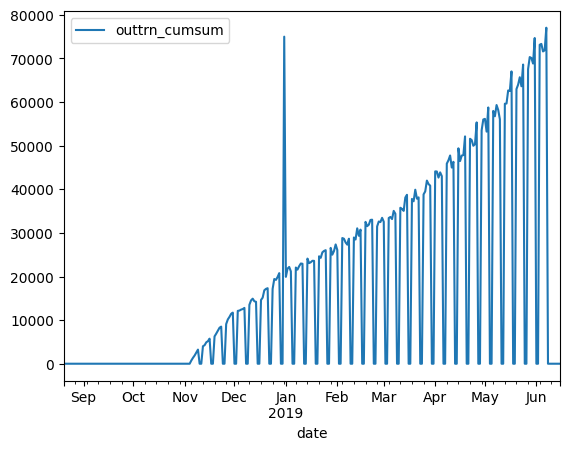

In [56]:
df_grow_plot.plot(x='date',y='outtrn_cumsum')
# df_grow_plot['outtrn_cumsum'].plot()

<Axes: title={'center': 'outtrn_cumsum'}, xlabel='date'>

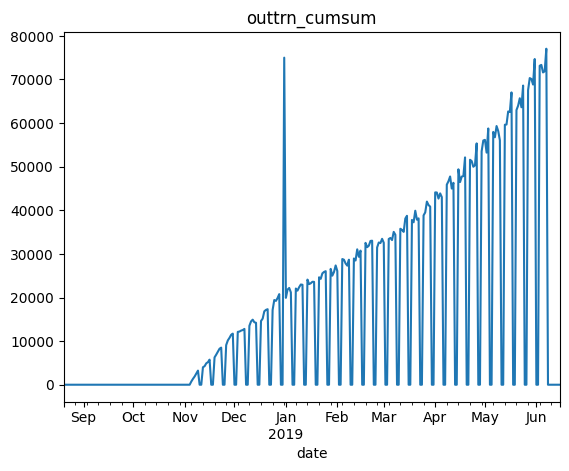

In [57]:
df_grow_plot=df_grow_plot.set_index("date")
df_grow_plot['outtrn_cumsum'].plot(title = 'outtrn_cumsum')

In [58]:
df_delna.columns

Index(['frmDist', 'date', 'inTp', 'inHd', 'otmsuplyqy', 'acSlrdQy', 'cunt',
       'ph', 'outTp', 'outWs', 'inCo2', 'ec', 'frmYear', 'frmWeek',
       'frtstGrupp', 'flanGrupp', 'frtstCo', 'tcdmt', 'frmhsFclu', 'hvstGrupp',
       'grwtLt', 'fcluHg', 'lefLt', 'hvstCo', 'lefCunt', 'lefBt', 'stemThck',
       'frmAr', 'frmDov', 'outtrn_cumsum', 'WaterUsage', 'WaterCost',
       'FertilizerUsage', 'FertilizerCost', 'CO2Usage', 'CO2Cost',
       'MistUsageTime', 'Mist Cost', 'HeatingEnergyUsage_cumsum'],
      dtype='object')

In [63]:
df_env

,date,inTp,outTp,inHd,inCo2,outWs,acSlrdQy,ec,ph,outtrn_cumsum,HeatingEnergyUsage_cumsum
0,20180820,24.585566,26.986688,56.593500,413.958125,1.713806,1914.875278,2.117362,5.406948,0.0,0.0
1,20180821,25.453482,29.511976,76.190261,294.499699,1.699817,1403.677837,2.760039,6.291961,0.0,0.0
2,20180822,30.066100,30.450327,78.349376,457.667685,1.877500,2004.139948,3.463863,6.256669,0.0,0.0
3,20180823,34.299016,23.454274,77.756144,433.307116,2.734247,550.795590,2.919290,5.164325,0.0,0.0
4,20180824,30.575093,28.246298,80.455124,438.218538,2.580904,907.196663,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
295,20190611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
296,20190612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
297,20190613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
298,20190614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [66]:
# df_grow_plot
df_env=df_env.reset_index()
df_env['date']= df_env['date'].astype('str')
df_env['date']=pd.to_datetime(df_env['date'])
df_env

,date,inTp,outTp,inHd,inCo2,outWs,acSlrdQy,ec,ph,outtrn_cumsum,HeatingEnergyUsage_cumsum
0,2018-08-20,24.585566,26.986688,56.593500,413.958125,1.713806,1914.875278,2.117362,5.406948,0.0,0.0
1,2018-08-21,25.453482,29.511976,76.190261,294.499699,1.699817,1403.677837,2.760039,6.291961,0.0,0.0
2,2018-08-22,30.066100,30.450327,78.349376,457.667685,1.877500,2004.139948,3.463863,6.256669,0.0,0.0
3,2018-08-23,34.299016,23.454274,77.756144,433.307116,2.734247,550.795590,2.919290,5.164325,0.0,0.0
4,2018-08-24,30.575093,28.246298,80.455124,438.218538,2.580904,907.196663,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
295,2019-06-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
296,2019-06-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
297,2019-06-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
298,2019-06-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


<Axes: >

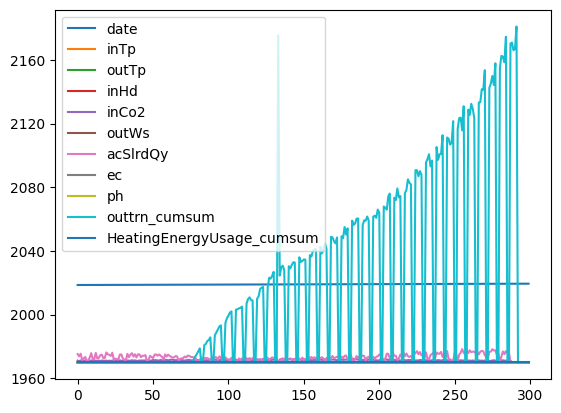

In [67]:
df_env.plot()

In [ ]:
df_env
df_env=df_env.set_index("date")
df_env['outtrn_cumsum'].plot(title = 'outtrn_cumsum')

In [ ]:


# ------------------------------------------------


#      SAMPLE MODEL


# ------------------------------------------------


###  INPUT ###
"""

Read CSV files from the given list of file paths and return DataFrames.

"""

import pandas as pd

input_data = pd.read_csv("2023_smartFarm_AI_hackathon_dataset.csv")
#  -------------------------------------------
###    Write codes...  ###
#      EXAMPLE CODE      #



def LSTM_model(df,batch_size_= 32, dropout_=.3,epochs_=500, samples=32):

    Features=df
    x_train = []
    y_train = []
    x_test = []
    y_test = []

    n_future = 1  # Number of days we want top predict into the future
    n_past = 7 # Number of past days we want to use to predict the future

    labels = np.array([row[0] for row in Features])
    indx = range(Features.shape[0])
    indx = ms.train_test_split(indx, test_size = 0.3, shuffle=False)

    #Features_train = sc.fit_transform(Features[0:len(indx[0])+1,:])
    #Features_test = sc.fit_transform(Features[len(indx[0])-n_past:len(Features),:])
    Features_train_x = sc.fit_transform(Features[0:len(indx[0])+1,1:7])
    Features_train_y = sc.fit_transform(Features[0:len(indx[0])+1,0:1])

    Features_train = np.hstack([Features_train_y,Features_train_x])

    Features_test_x = sc.fit_transform(Features[len(indx[0])-n_past:len(Features),1:7])
    Features_test_y = sc.fit_transform(Features[len(indx[0])-n_past:len(Features),0:1])

    Features_test = np.hstack([Features_test_y,Features_test_x])

    for i in range(n_past, len(indx[0]) - n_future +1):
        x_train.append(Features_train[i - n_past:i, 0:Features.shape[1]])
        y_train.append(Features_train[i:i + n_future ,0])

    for i in range(n_past, n_past+len(indx[1])):
        x_test.append(Features_test[i - n_past :i, 0:Features.shape[1]])
        y_test.append(Features_test[i:i + n_future,0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_test, y_test = np.array(x_test), np.array(y_test)
    # comment out this box and uncomment load_model to load saved model
    ###################################################################################

    # design network
    model = Sequential()
    model.add(LSTM(int(samples), input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dropout(dropout_))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit network
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs_,
                        batch_size=batch_size_,
                        validation_data=(x_test, y_test),
                        verbose=1,
                        shuffle=False,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])
    n_parameters=x_train.shape[1]
    y_score = sc.inverse_transform(model.predict(x_test))
    # print(y_score.shape)
    (rmse, r2) = print_metrics(sc.inverse_transform(y_test), y_score, n_parameters)
    # plot_res(sc.inverse_transform(y_test), y_score, label_test = 'y_test', label_score='y_predict')

# Predict 'y' values using the trained model
y_pred = model.predict(X_test)



# # Calculate RMSE between the predictions and actual 'y' values
# def calculate_rmse(targets, predictions):
#     """
#     Calculate the Root Mean Squared Error (RMSE) between predicted and target values.

#     :param predictions: Predicted values.
#     :type predictions: array-like
#     :param targets: Target values.
#     :type targets: array-like
#     :return: RMSE value.
#     :rtype: float
#     """
#     from sklearn.metrics import mean_squared_error
#     return np.sqrt(mean_squared_error(targets, model.predict(x_test)))


# Calculate r2_score between the predictions and actual 'y' values
def calculate_R2_score(y_test,y_pred):
    from sklearn.metrics import r2_score
    return r2_score(y_test, y_pred)


rmse = calculate_rmse(y_test, y_pred)
r2score = calculate_R2_score(y_test, y_pred)

# ------------------------------------------------
### OUTPUT ###
print("RMSE:", rmse)
print("R2_score:", r2score)
